# Shifting home in London - Choosing the best borough
---

## Author: Praveen Ramasubramaniam
## Date: October 8, 2019

### Introduction - About London: 
London is considered to be one of the world's most important global cities and has been termed the world's most powerful, most desirable, most influential, most visited, innovative, sustainable and most popular for work city in the world according to various sources. London exerts a considerable impact upon the arts, commerce, education, entertainment, fashion, finance, healthcare, media, professional services, research and development, tourism and transportation. It is one of the largest financial centres and is the most-visited city as measured by international arrivals and has the busiest city airport system as measured by passenger traffic. It is the leading investment destination, hosting more international retailers and ultra high-net-worth individuals than any other city. London's universities form the largest concentration of higher education institutes in Europe, and is home of world-class institutions such as Imperial College London in science, technology, engineering, and mathematics and the London School of Economics in economics, finance, and business.

London has a diverse range of people and cultures, and more than 300 languages are spoken in the region. It is the most populous of any city in the European Union and accounting for 13.4% of the UK population. The population within the London commuter belt is the most populous in the EU.

*Source: Wikipedia*

### Background: 
I am fortunate to work in London and reside in one of the outer Greater London boroughs which is also a commuter belt. There comes a point in time where due to the change in circumstances - socio-economic, financial, cultural or due to any other factors like change in job, expanding family, one may decide to shift his / her home and relocate to another property. There are a number of factors that one may consider to choose where to shift. Some of the factors can be: easy access to public transport, low crime rate in the area, good schools or educational institutions, healthcare facilities, entertainment avenues, make-up of the population in the area, socio-economic indicators within the area amongst others.

### Problem Statement:
This project is aimed at shortlisting one or more London boroughs to relocate based on a number of criteria that are specific to the author. The project will try to utilise most of the relevant data science topics learned in the lead up to the certification to answer the question. The actual criteria for selection would be reviewed, weighted and finalised as part of the final submission, however some of the initial indicators which are to be considered would be:
1. Access to public transport
2. Access to essential amenities - schools, medical care
3. Community safety - crime rate, incidents etc.,
4. Housing indicators - like average house prices, repossessions etc.,
5. Make up of the borough in terms of entertainment avenues, most visited places etc.,
6. Make-up of the population in terms of age, socio-economic indicators etc.,
7. Environment quality - pollution, green spaces etc.,       

### Data: 
London being a global city has quite a lot of data around most of the criteria specified in the Problem Statement section. The most important sources of data are likely to be:
1. [London Data Store](https://data.london.gov.uk "London Data Store")
2. [Office for National Statistics](https://www.ons.gov.uk "Office for National Statistics")
3. Foursquare API location data - for specific borough level details

Data obtained from these sources are likely to be in mixed format - csv, Microsoft excel etc., and care should be taken to ensure that the most appropriate data is obtained from the data sources, validated, cleansed and loaded into appropriate data structures (like pandas data frames) for analysis, clustering and to obtain the solution to the problem statement.

### Listing all the data sources
The following list of URLs are the source data for the London Borough analysis taken from different sources and aggregated at data.london.gov.uk website. The output for almost all individual data sources would be:
  1. Bar chart showing the visual patterns of the data for the various London boroughs
  2. Choropleth map / Heatmap of the data pattern against the various London boroughs
  3. List of the top 10 London boroughs for the data pattern

In [2]:
# Datasource URLs for the initial dataset related to London boroughs
# Borough Level Crime (Last 24 months)
crime_url = 'https://data.london.gov.uk/download/recorded_crime_summary/d2e9ccfc-a054-41e3-89fb-53c2bc3ed87a/MPS%20Borough%20Level%20Crime%20%28most%20recent%2024%20months%29.csv'
# Qualifications of working age population
quali_url = 'https://data.london.gov.uk/download/qualifications-working-age-population-nvq-borough/d6c40b15-44d7-4edb-a5b7-4b18a1b619f7/Qualifications-of-working-age-NVQ.csv'
# Population estimates by borough
pop_url = 'https://data.london.gov.uk/download/office-national-statistics-ons-population-estimates-borough/42672cc2-f789-4652-b952-6a332066c804/population-estimates-single-year-age.csv'
# Schools and pupils by type - by borough
school_pupil_url = 'https://data.london.gov.uk/download/schools-and-pupils-type-school-borough/29c0ae07-8f57-49dd-8b35-621734938e80/schools-pupils-borough.xls'
# GCSE results - by borough
gcse_url = 'https://data.london.gov.uk/download/gcse-results-by-borough/12a95356-81d3-49d6-8a13-e41b62f5e5c4/gcse-results.csv'
# KS1 results - by borough
ks1_url = 'https://data.london.gov.uk/download/key-stage-1-results-by-borough/ab9fc44c-a6d7-4649-8f22-5726b7bc47ff/ks1-results.xls'
# KS2 results - by borough
ks2_url = 'https://data.london.gov.uk/download/key-stage-2-results-by-borough/46a5a04b-35bf-4152-8816-8242a57c12b7/ks2-results.xls'
# EYF Stage profile results - by borough
eyf_url = 'https://data.london.gov.uk/download/early-years-foundation-stage-profile-assessment-results/da26afd7-3ec3-4555-bc79-32368b509e14/EYFSP%20key%20measures%20by%20year%20gender%20and%20local%20authority.xls'
# Earnings - Workplace - by borough
earning_url = 'https://data.london.gov.uk/download/average-income-tax-payers-borough/392e86d4-f1d3-4f06-a6a5-7fcd0fd65948/income-of-tax-payers.xls'
# Childhood obesity
child_obese_url = 'https://data.london.gov.uk/download/prevalence-childhood-obesity-borough/5bc12c32-3764-499a-84c9-391fc8b916fd/childhood-obesity-borough.xls'
# Smoking Indicators
smoke_url = 'https://data.london.gov.uk/download/smoking-indicators-borough/499ad3f9-a56b-4341-aea4-553cb95eb35b/smoking-status.xls'
# Personal well-being
wellbeing_url = 'https://data.london.gov.uk/download/subjective-personal-well-being-borough/d1bae8e8-f07b-4c2f-aec7-deed8006b52a/personal-well-being-borough.xls'
# Sports Participation rates
sports_part_url = 'https://data.london.gov.uk/download/sports-participation-rates-borough/7974d298-1050-4d60-90ce-dec09f34c3a0/sports-participation-borough-region.xls'
# Statutory homelessness
homeless_url = 'https://data.london.gov.uk/download/homelessness/7b28ad56-5698-4ea0-9a94-f301fcb62b3e/statutory-homelessness-borough%202017-18%20revised.xls'
# Licensed vehicles - borough
vehicles_url = 'https://data.london.gov.uk/download/licensed-vehicles-numbers-borough/45c47aba-682d-4be4-b62a-42215203c2ad/vehicles-licensed-borough.xls'
# Walking - cycling - borough
walk_cycle_url = 'https://data.london.gov.uk/download/walking-and-cycling-borough/c7ae3969-9d32-40ab-8407-589464030231/Walking-Cycling.csv'
# Public Transport Accessibility Levels
ptal_url = 'https://data.london.gov.uk/download/public-transport-accessibility-levels/8e520b81-dd06-4ce6-aaa0-972dccf84b57/Borough%20AvPTAI2015.csv'
# Average House Prices - borough
avg_house_price_url = 'https://data.london.gov.uk/download/average-house-prices/b1b0079e-698c-4c0b-b8c7-aa6189590ca4/land-registry-house-prices-borough.csv'

In [4]:
# Install Geopandas for mapping
!conda install geopandas

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - geopandas


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    rtree-0.8.3                |           py36_0          46 KB
    shapely-1.6.4              |   py36h86c5351_0         330 KB
    geopandas-0.4.1            |             py_0         891 KB
    openssl-1.1.1d             |       h7b6447c_3         3.7 MB
    proj4-5.2.0                |       he6710b0_1         7.0 MB
    poppler-data-0.4.9         |                0         3.5 MB
    hdf4-4.2.13                |       h3ca952b_2         916 KB
    json-c-0.13.1              |       h1bed415_0          70 KB
    libspatialindex-1.8.5      |       h20b78c2_2         666 KB
    libnetcdf-4.6.1            |       h11d0813_2         1.3 MB
    libspatialite-4.3.0a       |      hb08deb6_19         3.1 MB


In [5]:
#Load relevant libraries
import pandas as pd
import matplotlib
import numpy as np
import geopandas as gpd

### Crime data for London boroughs
The crime data covers monthwise crime data from Oct 2017 to Sep 2019. These crimes are categorised into major categories like Arson and Criminal Damage, Drug Offences etc., Each of these major categories has a number of minor categories under them and a count of the number of crimes month-wise for these categories are listed for each borough where applicable. 

For the purpose of this exercise, I have aggregated the crime numbers for the period between Oct 2017 to Sep 2018 shown as 2017-18 and between Oct 2018 to Sep 2019 shown as 2018-19. Further there is a separate location of London Heathrow and London City airports which is not a borough - and hence it is removed from the data analysis.

In [4]:
# Store data from the sources into individual Pandas dataframes before analysis and merging
df_crime = pd.read_csv(crime_url)
df_crime['2017-18'] = df_crime.iloc[:,3:15].sum(axis=1)
df_crime['2018-19'] = df_crime.iloc[:,15:27].sum(axis=1)
df_crime.drop(df_crime.iloc[:, 3:27], inplace = True, axis = 1)
df_crime.head()

,MajorText,MinorText,LookUp_BoroughName,2017-18,2018-19
0,Arson and Criminal Damage,Arson,Barking and Dagenham,62,59
1,Arson and Criminal Damage,Criminal Damage,Barking and Dagenham,1426,1416
2,Burglary,Burglary - Business and Community,Barking and Dagenham,354,379
3,Burglary,Burglary - Residential,Barking and Dagenham,1255,1204
4,Drug Offences,Drug Trafficking,Barking and Dagenham,76,65


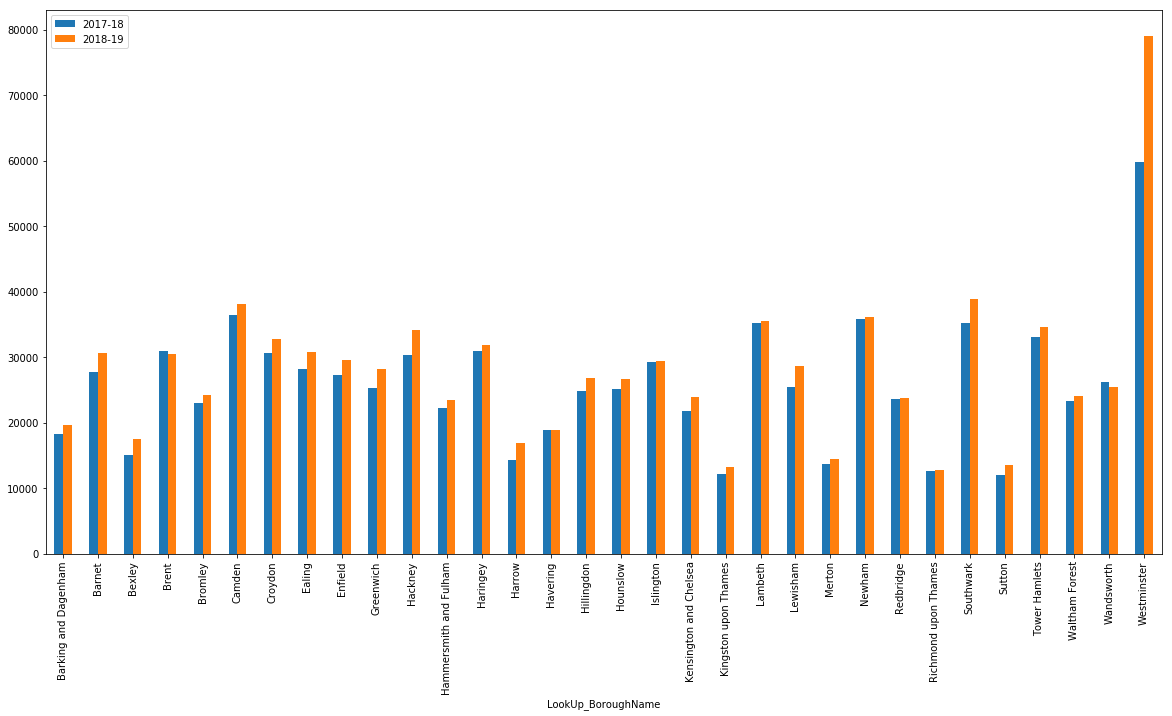

In [6]:
df_crime_update = df_crime.groupby(['LookUp_BoroughName']).sum()
df_crime_update.drop('London Heathrow and London City Airports', inplace=True)
df_crime_update.plot.bar(figsize=(20,10))

In [6]:
geo_json = 'https://skgrange.github.io/www/data/london_boroughs.json'
map_df = gpd.read_file(geo_json)
map_df.drop('id', axis=1, inplace=True)

In [37]:
map_df.sort_values(by='code', ascending=True, inplace=True)
crime_map = map_df.drop(map_df[map_df.name =='City of London'].index)

crime_map.set_index('name', inplace=True)
crime_map['Crime 2018-19'] = df_crime_update['2018-19']

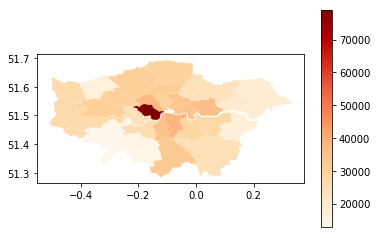

In [38]:
plot = crime_map.plot(column='Crime 2018-19', cmap='OrRd', legend=True)
fig = plot.get_figure()

In [30]:
#Show the top 10 boroughs based on least crime rates 
df_crime_update.sort_values(by=['2018-19', '2017-18'], ascending=True, inplace=True)
df_crime_update.head(10)

,2017-18,2018-19
LookUp_BoroughName,,
Richmond upon Thames,12633,12792
Kingston upon Thames,12099,13199
Sutton,11919,13453
Merton,13645,14441
Harrow,14283,16896
Bexley,15107,17474
Havering,18802,18890
Barking and Dagenham,18224,19631
Hammersmith and Fulham,22261,23440


### Qualifications of the working age population (16 - 64)
This datasource lists the qualifications of the working population for each of the boroughs from 2004 to 2017. These are categorised into:
  1. NVQ 4+ (highest qualification)
  2. NVQ 3 only
  3. Trade Apprenticeships
  4. NVQ 2 only
  5. NVQ 1 only
  6. with other qualifications
  7. with no qualifications

For the purpose of this analysis - I have removed the data from non-London boroughs as well as older data between 2004 and 2013. Further, to simplify, I have only considered the highest qualification - i.e. NVQ 4+ qualifications.

In [39]:
df_qual = pd.read_csv(quali_url)
df_qual.head()
df_qual.drop(columns=['number', 'denominator', 'confidence'], inplace=True)
# Remove data for non-London boroughs
remove_list = ['E13000001', 'E13000002', 'E12000001', 'E12000002', 'E12000003', 'E12000004', 'E12000005', 'E12000006', 'E12000007', 'E12000008', 'E12000009',
              'E92000001', 'W92000004', 'S92000003', 'N92000002', 'K04000001', 'K03000001', 'K02000001']
# Remove data for beyond the last five years - 2004 to 2013
df_qual.drop(df_qual[df_qual.Year < 2014].index, inplace=True)
df_qual.drop(df_qual[df_qual.Code.isin(remove_list)].index.tolist(), inplace=True)

# Retain data only for the highest qualification - NVQ4+
df_qual.drop(df_qual[df_qual['Qualifications of working age population (16-64)'] != 'NVQ4+'].index, inplace=True)
df_qual.head()

,Code,Area,Year,Qualifications of working age population (16-64),percent
3458,E09000001,City of London,2014,NVQ4+,59.6
3459,E09000002,Barking and Dagenham,2014,NVQ4+,29.5
3460,E09000003,Barnet,2014,NVQ4+,43.7
3461,E09000004,Bexley,2014,NVQ4+,33.2
3462,E09000005,Brent,2014,NVQ4+,45.9


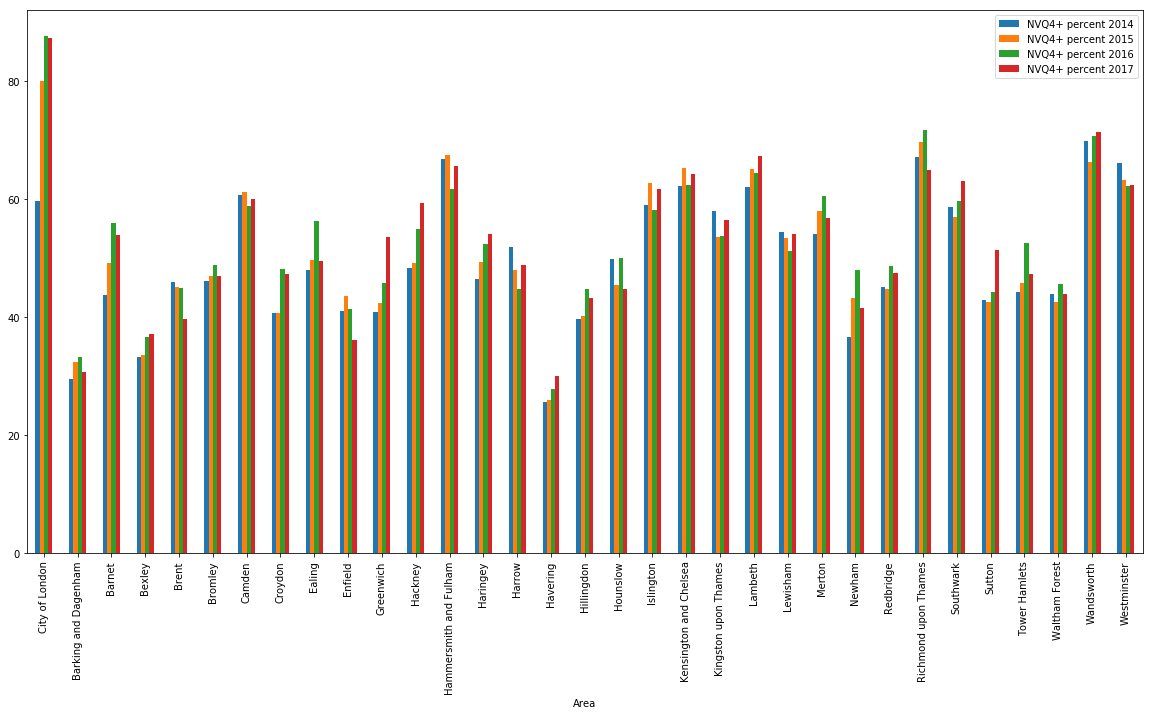

In [40]:
df_qual['percent'] = df_qual['percent'].astype(float)
# libraries
import numpy as np
import matplotlib.pyplot as plt
 
# get data for plotting
bars2014 = df_qual.loc[df_qual['Year']== 2014]
bars2014 = bars2014[['Area','percent']]
bars2014.set_index('Area', inplace=True)


bars2015 = df_qual.loc[df_qual['Year']== 2015]
bars2015 = bars2015[['Area','percent']]
bars2015.set_index('Area', inplace=True)

bars2016 = df_qual.loc[df_qual['Year']== 2016]
bars2016 = bars2016[['Area','percent']]
bars2016.set_index('Area', inplace=True)

bars2017 = df_qual.loc[df_qual['Year']== 2017]
bars2017 = bars2017[['Area','percent']]
bars2017.set_index('Area', inplace=True) 

df_merge_bar = pd.merge(bars2014, bars2015, on='Area')
df_merge_bar = pd.merge(df_merge_bar, bars2016, on='Area')
df_merge_bar = pd.merge(df_merge_bar, bars2017, on='Area')

df_merge_bar.columns = ['NVQ4+ percent 2014', 'NVQ4+ percent 2015', 'NVQ4+ percent 2016', 'NVQ4+ percent 2017']

df_merge_bar.plot.bar(figsize=(20,10))

In [41]:
map_df.set_index('name', inplace=True)
map_df['NVQ 4+ 2017'] = bars2017['percent']

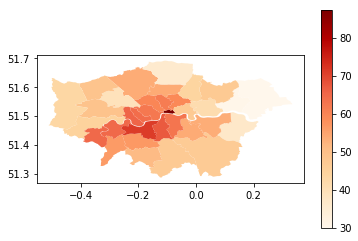

In [42]:
plot = map_df.plot(column='NVQ 4+ 2017', cmap='OrRd', legend=True)
fig = plot.get_figure()

In [43]:
#Show the top 10 boroughs based on most qualified population rate 
df_merge_bar.sort_values(by=['NVQ4+ percent 2017', 'NVQ4+ percent 2016'], ascending=False, inplace=True)
df_merge_bar.head(10)

,NVQ4+ percent 2014,NVQ4+ percent 2015,NVQ4+ percent 2016,NVQ4+ percent 2017
Area,,,,
City of London,59.6,80.0,87.6,87.2
Wandsworth,69.8,66.3,70.6,71.3
Lambeth,62.0,65.0,64.4,67.2
Hammersmith and Fulham,66.8,67.4,61.6,65.6
Richmond upon Thames,67.0,69.6,71.6,64.9
Kensington and Chelsea,62.2,65.3,62.4,64.2
Southwark,58.7,56.9,59.6,63.0
Westminster,66.1,63.2,62.1,62.3
Islington,58.9,62.7,58.1,61.7


### Population
This datasource lists the age of all male and female population in the borough for the years from 1999 to 2015 - resulting in 188 columns of data. For the purpose of this analysis, I have only considered the population of the London boroughs for the years from 2013 to 2015 (3 years). Further, I have aggregated all the individual population data into:
  1. Population under 18
  2. Population between 18 and 60
  3. Population over 60

I have only considered the working population as defined as the population of the boroughs between 18 and 60 for simplicity. 

In [44]:
df_pop = pd.read_csv(pop_url)
df_pop.replace(to_replace ='-', 
                 value =0, inplace=True) 

df_pop['F 86'] = df_pop['F 86'].astype(int)
df_pop['F 87'] = df_pop['F 87'].astype(int)
df_pop['F 88'] = df_pop['F 88'].astype(int)
df_pop['F 89'] = df_pop['F 89'].astype(int)
df_pop['F 90+'] = df_pop['F 90+'].astype(int)
df_pop.head()

,Code,Year,Borough,All Persons,All Males,M 0,M 1,M 2,M 3,M 4,...,F 81,F 82,F 83,F 84,F 85,F 86,F 87,F 88,F 89,F 90+
0,E09000001,1999,City of London,6581,3519,24,23,22,21,20,...,16,15,14,13,76,0,0,0,0,0
1,E09000001,2000,City of London,7014,3775,25,25,24,23,22,...,15,15,15,13,81,0,0,0,0,0
2,E09000001,2001,City of London,7359,3984,17,30,25,19,21,...,22,18,11,10,10,14,26,16,7,15
3,E09000001,2002,City of London,7280,3968,29,18,28,27,20,...,17,22,15,9,10,7,11,26,14,20
4,E09000001,2003,City of London,7115,3892,35,24,16,22,26,...,14,15,16,16,9,2,5,10,22,26


In [45]:
# Remove older data - keep only population data for 2013 to 2015
df_pop.drop(df_pop[df_pop.Year < 2013].index, inplace=True)
remove_list = ['E12000001', 'E12000002', 'E12000003', 'E12000004', 'E12000005', 'E12000006', 'E12000007', 'E12000008', 'E12000009', 'E13000001', 'E13000002',
              'E92000001', 'W92000004', 'S92000003', 'N92000002', 'K04000001', 'K03000001', 'K02000001']
df_pop.drop(df_pop[df_pop.Code.isin(remove_list)].index.tolist(), inplace=True)


df_pop['Males between 18 and 60'] = df_pop.iloc[:,23:66].sum(axis=1)
df_pop['Females between 18 and 60'] = df_pop.iloc[:,115:158].sum(axis=1)
df_pop['Total Working Population'] = df_pop['Males between 18 and 60'] + df_pop['Females between 18 and 60']
# Drop the individual data columns - keep only aggregate
cols = list(range(3,188))
df_pop.drop(df_pop.columns[cols],axis=1,inplace=True)

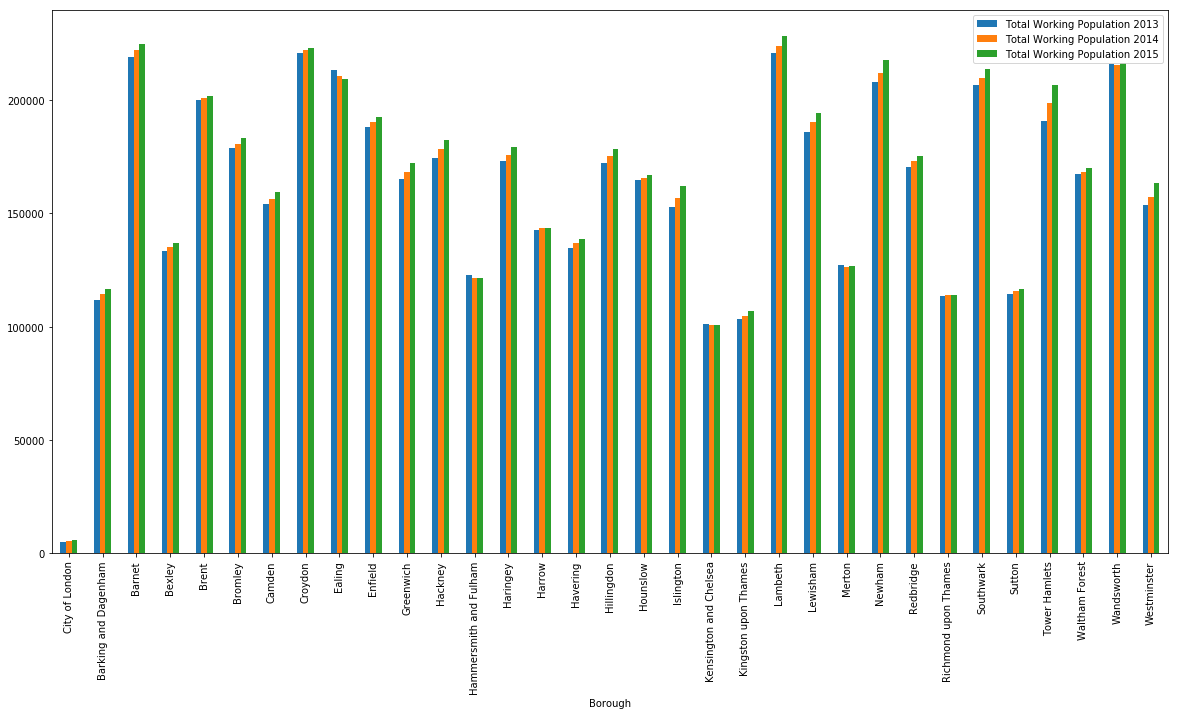

In [46]:
# get data for plotting
bars2013 = df_pop.loc[df_pop['Year']== 2013]
bars2013 = bars2013[['Borough','Total Working Population']]
bars2013.set_index('Borough', inplace=True)

bars2014 = df_pop.loc[df_pop['Year']== 2014]
bars2014 = bars2014[['Borough','Total Working Population']]
bars2014.set_index('Borough', inplace=True)

bars2015 = df_pop.loc[df_pop['Year']== 2015]
bars2015 = bars2015[['Borough','Total Working Population']]
bars2015.set_index('Borough', inplace=True)

df_merge_bar = pd.merge(bars2013, bars2014, on='Borough')
df_merge_bar = pd.merge(df_merge_bar, bars2015, on='Borough')

df_merge_bar.columns = ['Total Working Population 2013', 'Total Working Population 2014', 'Total Working Population 2015']
df_merge_bar.plot.bar(figsize=(20,10))

In [52]:
map_df.drop('NVQ 4+ 2017', axis=1, inplace=True)
map_df['Working Population 2015'] = bars2015['Total Working Population']

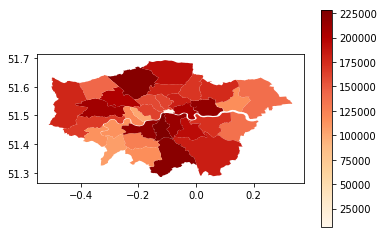

In [53]:
plot = map_df.plot(column='Working Population 2015', cmap='OrRd', legend=True)
fig = plot.get_figure()

In [54]:
#Show the top 10 boroughs based on most working population 
df_merge_bar.sort_values(by=['Total Working Population 2015', 'Total Working Population 2014'], ascending=False, inplace=True)
df_merge_bar.head(10)

,Total Working Population 2013,Total Working Population 2014,Total Working Population 2015
Borough,,,
Lambeth,220786,223775,228348
Barnet,218826,222108,224859
Croydon,220595,221873,222944
Newham,207984,211681,217693
Wandsworth,215907,215597,216218
Southwark,206763,209542,213829
Ealing,213099,210691,209412
Tower Hamlets,190668,198597,206577
Brent,200127,200736,201761


### School - Pupil
This datasource lists the number of different types of schools - State Funded Nursery, Primary, Secondary, Independent schools etc for each borough and the number of students attending each type of schools for the same. For the purpose of this exercise, I was more concerned with the number of pupils per school for each borough disregarding the type of school. I have taken the latest data for the year 2018 for consideration and have analysed the same for comparison across the London boroughs.

In [69]:
df_school_pupil = pd.read_excel(school_pupil_url, sheet_name = '2018', skiprows = 5, nrows = 33, header=None)
df_school_pupil.head()

,0,1,2,3,4,5,6,7,8,9,...,24,25,26,27,28,29,30,31,32,33
0,E09000001,City of London,0,NaN,1,NaN,0,NaN,0,0,...,NaN,0,0,0,NaN,0,NaN,2098,NaN,2382
1,E09000002,Barking and Dagenham,0,NaN,44,NaN,13,NaN,2,0,...,NaN,391,0,391,NaN,176,NaN,184,NaN,43506
2,E09000003,Barnet,4,NaN,90,NaN,25,NaN,5,0,...,NaN,531,0,531,NaN,85,NaN,7345,NaN,65789
3,E09000004,Bexley,0,NaN,57,NaN,16,NaN,5,0,...,NaN,488,0,488,NaN,36,NaN,690,NaN,44498
4,E09000005,Brent,4,NaN,60,NaN,15,NaN,4,0,...,NaN,686,0,686,NaN,53,NaN,3026,NaN,51308


In [70]:
df_school_pupil.dropna(axis='columns', how= 'all', inplace=True)
df_school_pupil.head()

,0,1,2,4,6,8,9,10,12,14,16,19,21,23,25,26,27,29,31,33
0,E09000001,City of London,0,1,0,0,0,0,0,4,5,0,284,0,0,0,0,0,2098,2382
1,E09000002,Barking and Dagenham,0,44,13,2,0,2,1,4,64,0,26793,15962,391,0,391,176,184,43506
2,E09000003,Barnet,4,90,25,5,0,5,2,37,163,486,31755,25587,531,0,531,85,7345,65789
3,E09000004,Bexley,0,57,16,5,0,5,1,5,84,0,22934,20350,488,0,488,36,690,44498
4,E09000005,Brent,4,60,15,4,0,4,2,18,103,444,27640,19459,686,0,686,53,3026,51308


In [71]:
df_school_pupil.columns = ['Code', 'Borough', 'School SF Nursery', 'School SF Primary', 'School SF Secondary', 'School Special SF Primary', 
                           'School Special Non Maintained', 'School Special Total', 'School Pupil Referral Units', 'School Independent', 'All Schools',
                           'Pupil SF Nursery', 'Pupil SF Primary', 'Pupil SF Secondary', 'Pupil Special SF', 'Pupil Special Non Maintained',
                           'Pupil Special Total', 'Pupil Referral Units', 'Pupil Independent', 'Pupil All Schools']
df_school_pupil.head()

,Code,Borough,School SF Nursery,School SF Primary,School SF Secondary,School Special SF Primary,School Special Non Maintained,School Special Total,School Pupil Referral Units,School Independent,All Schools,Pupil SF Nursery,Pupil SF Primary,Pupil SF Secondary,Pupil Special SF,Pupil Special Non Maintained,Pupil Special Total,Pupil Referral Units,Pupil Independent,Pupil All Schools
0,E09000001,City of London,0,1,0,0,0,0,0,4,5,0,284,0,0,0,0,0,2098,2382
1,E09000002,Barking and Dagenham,0,44,13,2,0,2,1,4,64,0,26793,15962,391,0,391,176,184,43506
2,E09000003,Barnet,4,90,25,5,0,5,2,37,163,486,31755,25587,531,0,531,85,7345,65789
3,E09000004,Bexley,0,57,16,5,0,5,1,5,84,0,22934,20350,488,0,488,36,690,44498
4,E09000005,Brent,4,60,15,4,0,4,2,18,103,444,27640,19459,686,0,686,53,3026,51308


In [58]:
df_school_pupil['Pupils per school'] = df_school_pupil.iloc[:,-1] / df_school_pupil.iloc[:,10]
df_school_pupil_chart = df_school_pupil[['Borough','Pupils per school']]
df_school_pupil_chart.set_index('Borough', inplace=True)

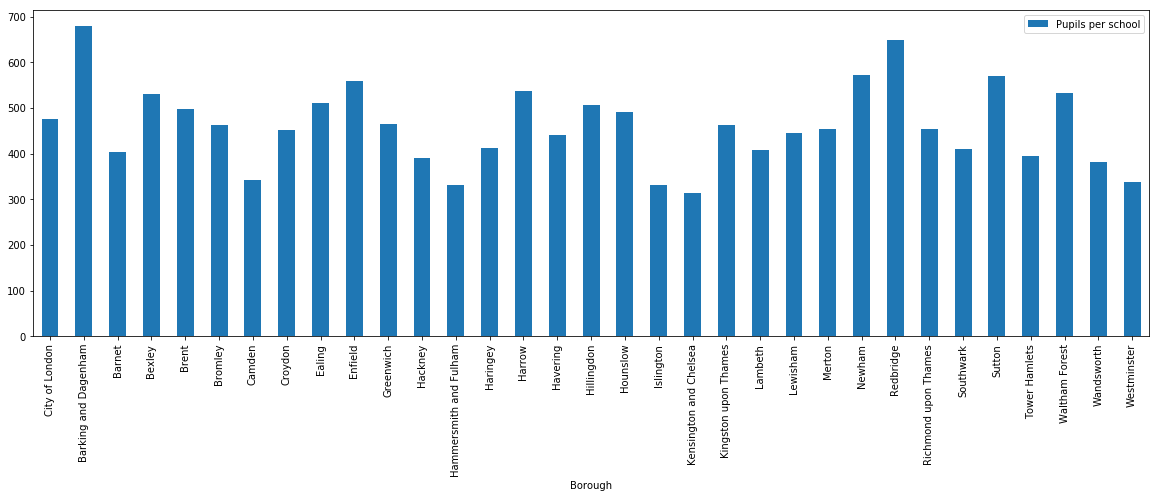

In [59]:
df_school_pupil_chart.plot.bar(figsize=(20,6))

In [60]:
map_df.drop('Working Population 2015', axis=1, inplace=True)
map_df['Pupils per school'] = df_school_pupil_chart['Pupils per school']

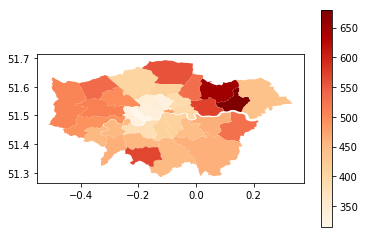

In [61]:
plot = map_df.plot(column='Pupils per school', cmap='OrRd', legend=True)
fig = plot.get_figure()

In [62]:
#Show the top 10 boroughs based on least pupil per school 
df_school_pupil_chart.sort_values(by=['Pupils per school'], ascending=True, inplace=True)
df_school_pupil_chart.head(10)

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


,Pupils per school
Borough,
Kensington and Chelsea,314.444444
Islington,331.923077
Hammersmith and Fulham,332.469880
Westminster,338.617021
Camden,343.347368
Wandsworth,380.675214
Hackney,390.956140
Tower Hamlets,393.983333
Barnet,403.613497


### GCSE
GCSE is a very important indicator of the performance of the students and the schools and is often the most analysed educational data. For the purpose of this analysis, I have only considered the London borough data for the years 2015-16 and 2016-17. I have also disregarded the individual sex of the students - i.e. boys and girls and have only taken the collective data. For charting, I have taken the Attainment8 percentage of the students for each of the London boroughs.

In [63]:
df_gcse = pd.read_csv(gcse_url)
df_gcse.head()

,Code,Area,Year,Sex,Pupils,Attainment8,Progress8
0,E09000001,City of London,2016/17,All,.,.,.
1,E09000002,Barking and Dagenham,2016/17,All,2185,46.7,0.23
2,E09000003,Barnet,2016/17,All,3528,54.7,0.47
3,E09000004,Bexley,2016/17,All,3141,49,-0.05
4,E09000005,Brent,2016/17,All,2908,49,0.49


In [64]:
# Remove non-London boroughs as well as City of London as no proper data available for the latter
remove_list = ['E13000001', 'E13000002', 'E12000001', 'E12000002', 'E12000003', 'E12000004', 'E12000005', 'E12000006', 'E12000007', 'E12000008', 'E12000009',
              'E92000001', 'E09000001']
df_gcse.drop(df_gcse[df_gcse.Code.isin(remove_list)].index.tolist(), inplace=True)
df_gcse.drop(df_gcse[df_gcse.Sex != 'All'].index, inplace=True)
df_gcse.head()

,Code,Area,Year,Sex,Pupils,Attainment8,Progress8
1,E09000002,Barking and Dagenham,2016/17,All,2185,46.7,0.23
2,E09000003,Barnet,2016/17,All,3528,54.7,0.47
3,E09000004,Bexley,2016/17,All,3141,49,-0.05
4,E09000005,Brent,2016/17,All,2908,49,0.49
5,E09000006,Bromley,2016/17,All,3258,49.8,0.12


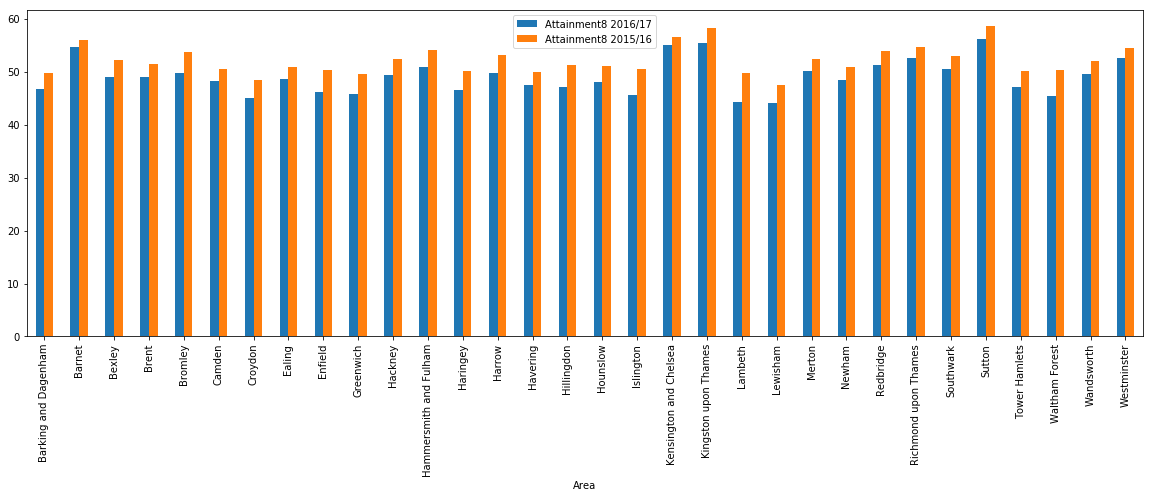

In [65]:
# get data for plotting
bars2017 = df_gcse.loc[df_gcse['Year']== '2016/17']
bars2017 = bars2017[['Area','Attainment8']]
bars2017.set_index('Area', inplace=True)

bars2016 = df_gcse.loc[df_gcse['Year']== '2015/16']
bars2016 = bars2016[['Area','Attainment8']]
bars2016.set_index('Area', inplace=True)

df_gcse_bar = pd.merge(bars2017, bars2016, on='Area')
df_gcse_bar.columns = ['Attainment8 2016/17', 'Attainment8 2015/16']

df_gcse_bar['Attainment8 2016/17'] = df_gcse_bar['Attainment8 2016/17'].astype(float)
df_gcse_bar['Attainment8 2015/16'] = df_gcse_bar['Attainment8 2015/16'].astype(float)
#print(df_gcse_bar)
df_gcse_bar.plot.bar(figsize=(20,6))

In [72]:
map_df.drop('Pupils per school', axis=1, inplace=True)
map_df['Attainment 8 2016/17'] = df_gcse_bar['Attainment8 2016/17']

gcse_map = map_df.drop('City of London')

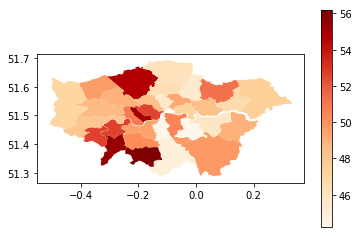

In [76]:
plot = gcse_map.plot(column='Attainment 8 2016/17', cmap='OrRd', legend=True)
fig = plot.get_figure()

In [80]:
#Show the top 10 boroughs based on best Attainment 8 scores 
df_gcse_bar.sort_values(by=['Attainment8 2016/17'], ascending=False, inplace=True)
df_gcse_bar.head(10)

,Attainment8 2016/17,Attainment8 2015/16
Area,,
Sutton,56.2,58.7
Kingston upon Thames,55.5,58.2
Kensington and Chelsea,55.0,56.6
Barnet,54.7,56.1
Richmond upon Thames,52.7,54.6
Westminster,52.6,54.5
Redbridge,51.2,53.9
Hammersmith and Fulham,50.9,54.1
Southwark,50.5,52.9


### KS1
KS1 or Key Stage 1 is an important indicator for primary education. Along with GCSE, KS2 and Early Years Foundation, this forms the core of educational data analysis in England. For the purpose of this exercise, I have taken the data corresponding to the year 2018 and have dis-regarded the data from earlier years. I have also discounted the data for non-London boroughs. I have not taken the distinction between the performance of the boys vs girls for this analysis. I have taken two specific metrics:
  1. Average expected standard - taken as the average of expected standard in Maths, Read and Write
  2. Average Greater depth - taken as the average of the greater depth in Maths, Read and Write
  
I have plotted the charts against these metrics for comparison of performance of the different London boroughs.

In [90]:
df_ks1 = pd.read_excel(ks1_url, sheet_name = '2018', skiprows = 4, nrows = 33, header=None)
df_ks1.head()

,0,1,2,3,4,5,6,7,8,9,...,27,28,29,30,31,32,33,34,35,36
0,E09000001,City of London,*,*,*,*,*,*,*,*,...,*,*,*,*,*,*,*,*,*,*
1,E09000002,Barking and Dagenham,3678,3678,3678,3678,75,70,76,82,...,1784,1784,1784,80,78,79,87,29,21,21
2,E09000003,Barnet,4445,4445,4445,4445,79,73,79,84,...,2181,2181,2181,82,79,80,85,30,20,21
3,E09000004,Bexley,3346,3346,3346,3346,81,76,81,86,...,1621,1621,1621,83,81,82,88,34,26,26
4,E09000005,Brent,3891,3891,3891,3891,75,68,75,81,...,1825,1825,1825,80,76,77,85,27,19,18


In [91]:
cols = [2,3,4,5,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36]
df_ks1.drop(df_ks1.columns[cols],axis=1,inplace=True)
df_ks1.head()

,0,1,6,7,8,9,10,11,12
0,E09000001,City of London,*,*,*,*,*,*,*
1,E09000002,Barking and Dagenham,75,70,76,82,27,17,26
2,E09000003,Barnet,79,73,79,84,27,16,28
3,E09000004,Bexley,81,76,81,86,30,22,30
4,E09000005,Brent,75,68,75,81,23,15,23


In [93]:
df_ks1.columns = ['Code', 'Borough', 'Exp Std Read', 'Exp Std Write', 'Exp Std Maths', 'Exp Std Science', 
                  'Greater Depth Read', 'Greater Depth Write', 'Greater Depth Maths']
df_ks1.head()

,Code,Borough,Exp Std Read,Exp Std Write,Exp Std Maths,Exp Std Science,Greater Depth Read,Greater Depth Write,Greater Depth Maths
0,E09000001,City of London,*,*,*,*,*,*,*
1,E09000002,Barking and Dagenham,75,70,76,82,27,17,26
2,E09000003,Barnet,79,73,79,84,27,16,28
3,E09000004,Bexley,81,76,81,86,30,22,30
4,E09000005,Brent,75,68,75,81,23,15,23


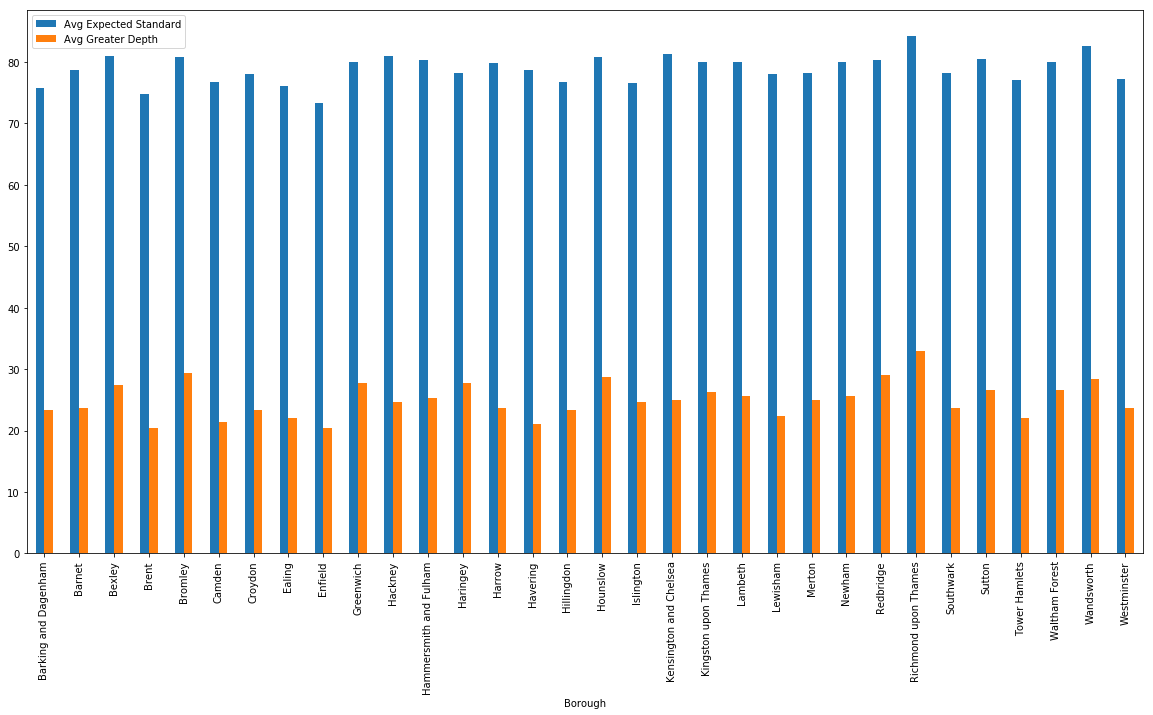

In [105]:
# Remove data for non-London boroughs and City of London - due to missing data
remove_list = ['E13000001', 'E13000002', 'E12000001', 'E12000002', 'E12000003', 'E12000004', 'E12000005', 'E12000006', 'E12000007', 'E12000008', 'E12000009',
              'E92000001', 'E09000001']
df_ks1.drop(df_ks1[df_ks1.Code.isin(remove_list)].index.tolist(), inplace=True)
df_ks1.dtypes
df_ks1['Exp Std Read'] = df_ks1['Exp Std Read'].astype(int)
df_ks1['Exp Std Write'] = df_ks1['Exp Std Write'].astype(int)
df_ks1['Exp Std Maths'] = df_ks1['Exp Std Maths'].astype(int)
df_ks1['Exp Std Science'] = df_ks1['Exp Std Science'].astype(int)
df_ks1['Greater Depth Read'] = df_ks1['Greater Depth Read'].astype(int)
df_ks1['Greater Depth Write'] = df_ks1['Greater Depth Write'].astype(int)
df_ks1['Greater Depth Maths'] = df_ks1['Greater Depth Maths'].astype(int)

#Add 2 columns - Average Expected Standard and Average Greater Depth for easy visualisation
df_ks1['Avg Expected Standard'] = (df_ks1.iloc[:,2] + df_ks1.iloc[:,3] + df_ks1.iloc[:,4] + df_ks1.iloc[:,5]) / 4
df_ks1['Avg Greater Depth'] = (df_ks1.iloc[:,6] + df_ks1.iloc[:,7] + df_ks1.iloc[:,8]) / 3

#df_ks1.head()

#Drop redundant columns for easier visualisation
df_ks1_chart = df_ks1[['Borough', 'Avg Expected Standard', 'Avg Greater Depth']]
df_ks1_chart.set_index('Borough', inplace=True)

#Plot Bar chart
df_ks1_chart.plot.bar(figsize=(20,10))

In [106]:
#map_df.drop('Attainment 8 2016/17', axis=1, inplace=True)
ks1_map = map_df.drop('City of London')
ks1_map['KS1 Avg Greater Depth'] = df_ks1_chart['Avg Greater Depth']

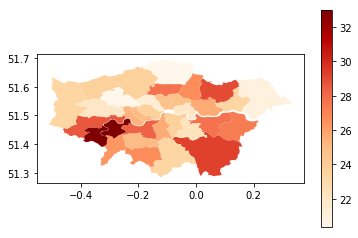

In [108]:
plot = ks1_map.plot(column='KS1 Avg Greater Depth', cmap='OrRd', legend=True)
fig = plot.get_figure()

In [109]:
#Show the top 10 boroughs based on best Average Greater Depth scores 
df_ks1_chart.sort_values(by=['Avg Greater Depth'], ascending=False, inplace=True)
df_ks1_chart.head(10)

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


,Avg Expected Standard,Avg Greater Depth
Borough,,
Richmond upon Thames,84.25,33.000000
Bromley,80.75,29.333333
Redbridge,80.25,29.000000
Hounslow,80.75,28.666667
Wandsworth,82.50,28.333333
Haringey,78.25,27.666667
Greenwich,80.00,27.666667
Bexley,81.00,27.333333
Sutton,80.50,26.666667


### KS2
Key Stage 2 is a phase of primary education for pupils aged 7 to 11 in England and Wales. Similar to KS1, the metrics correspond to performance of the students across metrics in Reading, Writing and Maths for the latest dataset covering the year 2018. For the purpose of this exercise, I have taken only the metrics for Expected Standard across all sections (Read, Write and Maths) as well as the corresponding metrics for Higher Standard. 

In [110]:
df_ks2 = pd.read_excel(ks2_url, sheet_name = '2018', skiprows = 4, nrows = 33, header=None)
df_ks2.head()

,0,1,2,3,4,5,6,7,8,9,...,28,29,30,31,32,33,34,35,36,37
0,E09000001,City of London,29,29,29,29,76,86,90,72,...,14,14,71,86,86,71,43,57,21,21
1,E09000002,Barking and Dagenham,3411,3411,3411,3410,75,83,80,67,...,1657,1657,80,87,81,72,31,49,25,12
2,E09000003,Barnet,3978,3978,3978,3978,82,85,83,73,...,1909,1909,85,88,83,76,39,51,27,14
3,E09000004,Bexley,3183,3183,3183,3183,80,82,79,70,...,1564,1564,83,86,80,75,37,46,28,15
4,E09000005,Brent,3644,3644,3644,3644,73,80,78,63,...,1734,1734,77,85,80,69,30,49,26,10


In [111]:
cols = [2,3,4,5,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37]
df_ks2.drop(df_ks2.columns[cols],axis=1,inplace=True)
df_ks2.columns = ['Code', 'Borough', 'Exp Std Eng Read', 'Exp Std Eng Write', 'Exp Std Maths', 'Exp Std All (Read, Write, Maths)', 
                  'Higher Std Eng Read', 'Higher Std Eng Write', 'Higher Std Maths', 'Higher Std All (Read, Write, Maths)']
df_ks2.head()

,Code,Borough,Exp Std Eng Read,Exp Std Eng Write,Exp Std Maths,"Exp Std All (Read, Write, Maths)",Higher Std Eng Read,Higher Std Eng Write,Higher Std Maths,"Higher Std All (Read, Write, Maths)"
0,E09000001,City of London,76,86,90,72,45,62,24,21
1,E09000002,Barking and Dagenham,75,83,80,67,27,43,26,9
2,E09000003,Barnet,82,85,83,73,35,47,32,12
3,E09000004,Bexley,80,82,79,70,33,42,30,14
4,E09000005,Brent,73,80,78,63,26,43,28,9


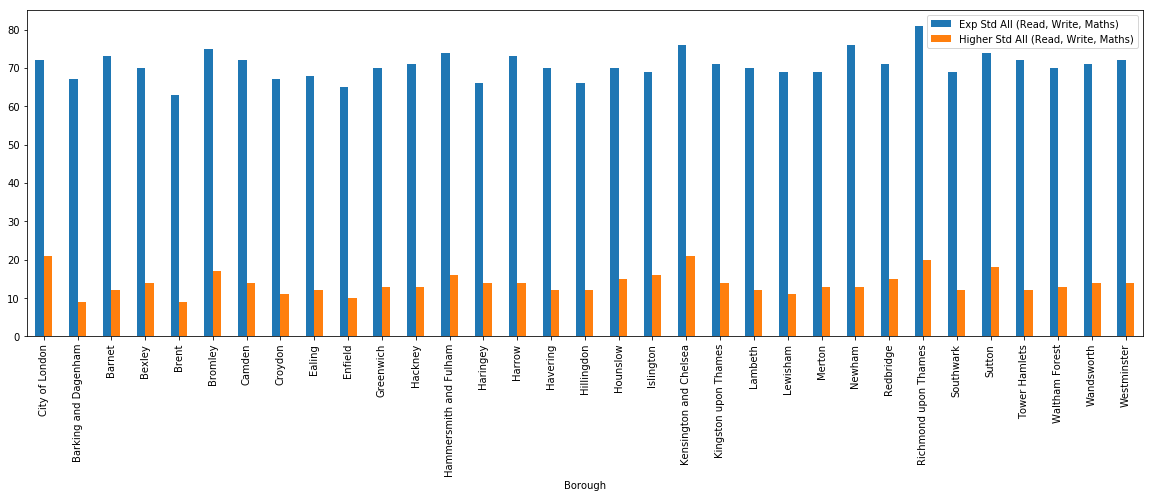

In [112]:
df_ks2_chart = df_ks2[['Borough', 'Exp Std All (Read, Write, Maths)', 'Higher Std All (Read, Write, Maths)']]
df_ks2_chart.set_index('Borough', inplace=True)
df_ks2_chart.plot.bar(figsize =(20,6))

In [114]:
map_df.drop('KS1 Avg Greater Depth', axis=1, inplace=True)
map_df['Higher Std All (Read, Write, Maths)'] = df_ks2_chart['Higher Std All (Read, Write, Maths)']

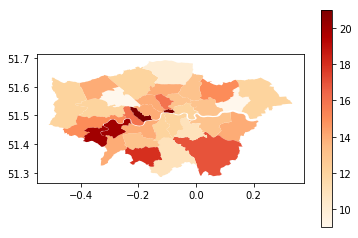

In [115]:
plot = map_df.plot(column='Higher Std All (Read, Write, Maths)', cmap='OrRd', legend=True)
fig = plot.get_figure()

In [116]:
#Show the top 10 boroughs based on best Higher Standard scores 
df_ks2_chart.sort_values(by=['Higher Std All (Read, Write, Maths)'], ascending=False, inplace=True)
df_ks2_chart.head(10)

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


,"Exp Std All (Read, Write, Maths)","Higher Std All (Read, Write, Maths)"
Borough,,
City of London,72,21
Kensington and Chelsea,76,21
Richmond upon Thames,81,20
Sutton,74,18
Bromley,75,17
Islington,69,16
Hammersmith and Fulham,74,16
Redbridge,71,15
Hounslow,70,15


### Early Years Foundation Stage
The early years foundation stage (EYFS) sets standards for the learning, development and care of the child from birth to 5 years old. Similar to other education metrics, I have taken the dataset for the year 2018 across all London boroughs. In particular, I have considered the Expected Levels across all Early Learning Goals (ELG) and the Good Level of Development for comparison against the London boroughs. 

In [117]:
df_eyf = pd.read_excel(eyf_url, sheet_name = '2018', skiprows = 2, nrows = 33, header=None)
df_eyf.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,E09000001,City of London,48,28,20,34.6,36.0,32.7,3.3,79.2,89.3,65.0,24.3,81.3,89.3,70.0,19.3
1,E09000002,Barking and Dagenham,3641,1703,1938,33.8,35.2,32.6,2.6,68.6,75.9,62.3,13.6,71.3,77.7,65.7,12.0
2,E09000003,Barnet,4408,2108,2300,34.7,35.9,33.6,2.2,73.3,81.2,66.0,15.2,74.0,81.6,67.0,14.6
3,E09000004,Bexley,3136,1548,1588,35.3,36.6,34.0,2.6,75.4,82.7,68.2,14.5,77.1,83.8,70.5,13.3
4,E09000005,Brent,3757,1821,1936,33.3,34.5,32.2,2.3,68.7,75.3,62.5,12.8,69.8,76.3,63.6,12.7


In [118]:
cols = [2,3,4,6,7,8,10,11,12,14,15,16]
df_eyf.drop(df_eyf.columns[cols],axis=1,inplace=True)
df_eyf.columns = ['Code', 'Borough', 'Avg Total Point Score', '% Exp Levels across all ELGs', '% Good Level of development']
df_eyf.head()

,Code,Borough,Avg Total Point Score,% Exp Levels across all ELGs,% Good Level of development
0,E09000001,City of London,34.6,79.2,81.3
1,E09000002,Barking and Dagenham,33.8,68.6,71.3
2,E09000003,Barnet,34.7,73.3,74.0
3,E09000004,Bexley,35.3,75.4,77.1
4,E09000005,Brent,33.3,68.7,69.8


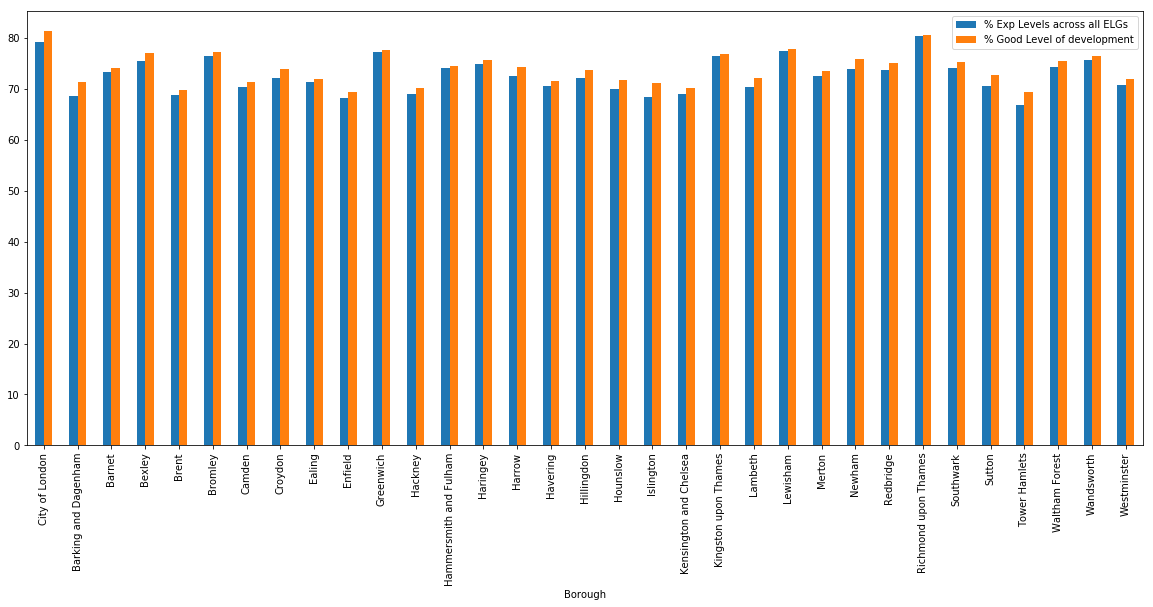

In [119]:
df_eyf = df_eyf[['Borough', '% Exp Levels across all ELGs', '% Good Level of development']]
df_eyf.set_index('Borough', inplace=True)
df_eyf.plot.bar(figsize =(20,8))

In [120]:
map_df.drop('Higher Std All (Read, Write, Maths)', axis=1, inplace=True)
map_df['% Good Level of development'] = df_eyf['% Good Level of development']

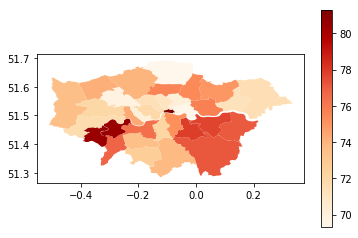

In [121]:
plot = map_df.plot(column='% Good Level of development', cmap='OrRd', legend=True)
fig = plot.get_figure()

In [122]:
#Show the top 10 boroughs based on % Good level of development scores 
df_eyf.sort_values(by=['% Good Level of development', '% Exp Levels across all ELGs'], ascending=False, inplace=True)
df_eyf.head(10)

,% Exp Levels across all ELGs,% Good Level of development
Borough,,
City of London,79.2,81.3
Richmond upon Thames,80.3,80.5
Lewisham,77.4,77.9
Greenwich,77.3,77.7
Bromley,76.5,77.2
Bexley,75.4,77.1
Kingston upon Thames,76.5,76.8
Wandsworth,75.7,76.4
Newham,73.9,75.8


### Income Levels
This dataset provides information on the mean and median income of the working population across the London boroughs. For the purpose of this exercise, I have considered only the median income of the working population of the different London boroughs for the last 3 years of available data: 2014-15 to 2016-17.

In [179]:
df_income = pd.read_excel(earning_url, sheet_name = 'Total Income', skiprows = 3, nrows = 33, header=None)
df_income.head()

,0,1,2,3,4,5,6,7,8,9,...,43,44,45,46,47,48,49,50,51,52
0,E09000001,City of London,10000,109800,40400,10000,137000,65000,12000,92900,...,65300,9000,144000,61100,10000,142000,60000,12000,157000,57300
1,E09000002,Barking and Dagenham,62000,16200,15100,71000,18100,15600,56000,18600,...,21000,74000,25500,21800,83000,25900,22100,88000,26700,23300
2,E09000003,Barnet,161000,26800,18700,156000,30800,19400,159000,30400,...,26800,175000,45800,27100,178000,49000,27700,180000,48600,28800
3,E09000004,Bexley,105000,20500,17200,116000,19800,17300,112000,22000,...,24400,122000,30200,24400,127000,30900,24500,125000,32300,26100
4,E09000005,Brent,122000,20000,16500,130000,22200,16800,127000,21100,...,21300,147000,31200,22700,154000,32600,23200,155000,34100,24100


In [180]:
cols = list(range(2,44))
df_income.drop(df_income.columns[cols],axis=1,inplace=True)
df_income.columns = ['Code', 'Borough', 'No of Individuals 2014-15', 'Mean £ 2014-15', 'Median £ 2014-15', 'No of Individuals 2015-16', 
                     'Mean £ 2015-16', 'Median £ 2015-16', 'No of Individuals 2016-17', 'Mean £ 2016-17', 'Median £ 2016-17']

In [181]:
df_income = df_income[['Borough', 'Median £ 2014-15', 'Median £ 2015-16', 'Median £ 2016-17']]
df_income.set_index('Borough', inplace=True)

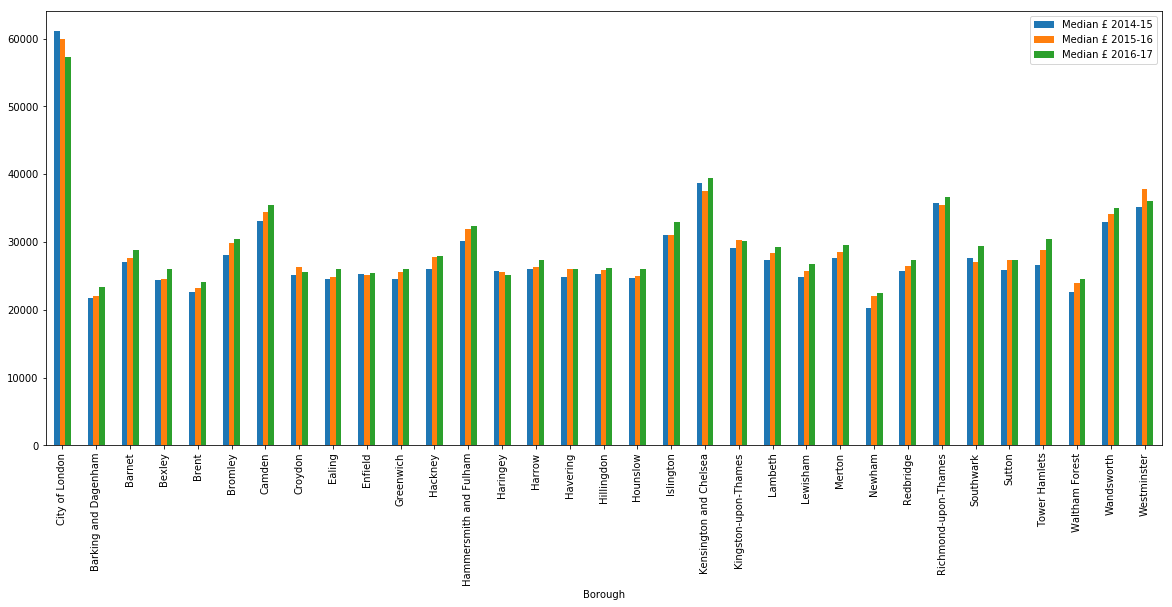

In [182]:
df_income.plot.bar(figsize =(20,8))

In [183]:
map_df.drop('% Good Level of development', axis=1, inplace=True)
map_df['Median £ 2016-17'] = df_income['Median £ 2016-17']

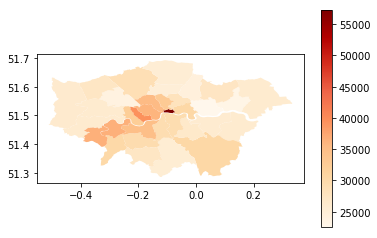

In [185]:
map_df.at['Kingston upon Thames', 'Median £ 2016-17'] = df_income.at['Kingston-upon-Thames', 'Median £ 2016-17']
map_df.at['Richmond upon Thames', 'Median £ 2016-17'] = df_income.at['Richmond-upon-Thames', 'Median £ 2016-17']

plot = map_df.plot(column='Median £ 2016-17', cmap='OrRd', legend=True)
fig = plot.get_figure()

In [186]:
#Show the top 10 boroughs based on Median Income 
df_income.sort_values(by=['Median £ 2016-17', 'Median £ 2015-16', 'Median £ 2014-15'], ascending=False, inplace=True)
df_income.head(10)

,Median £ 2014-15,Median £ 2015-16,Median £ 2016-17
Borough,,,
City of London,61100,60000,57300
Kensington and Chelsea,38700,37500,39500
Richmond-upon-Thames,35800,35500,36600
Westminster,35100,37800,36100
Camden,33100,34400,35500
Wandsworth,32900,34200,35000
Islington,31000,31100,32900
Hammersmith and Fulham,30100,32000,32300
Tower Hamlets,26600,28900,30500


### Obesity Indicators
This dataset is part of the health group and provides data on childhood obesity prevalence for 2 age groups: Reception (typically 4 - 5 years old) and Year 6 (typically around 11 years old). The data is categorised into:
  1. Underweight percentage (at Reception and Year 6)
  2. Healthy weight percentage (at Reception and Year 6)
  3. Overweight percentage (at Reception and Year 6)
  4. Obese percentage (at Reception and Year 6)
  5. Severely Obese (at Reception and Year 6)
  
For the purpose of this exercise, I have taken only the Healthy weight, Obese and Severely Obese data for Year 6 for visualisation.

In [187]:
df_obese = pd.read_excel(child_obese_url, sheet_name = '2017-18', skiprows = 4, nrows = 32, header=None)
df_obese.head()

,0,1,2,3,4,5,6,7,8,9,...,24,25,26,27,28,29,30,31,32,33
0,E09000002,Barking and Dagenham,1.348113,1.009064,1.799012,1.47902,1.12059,1.94985,72.857999,71.323795,...,28.496127,31.616527,4.493709,3.841691,5.250346,6.731059,5.927001,7.635343,3338,3313
1,E09000003,Barnet,1.176753,0.891285,1.552221,1.44218,1.11231,1.86804,78.890490,77.624654,...,17.401413,19.848407,2.281460,1.870011,2.780872,3.682720,3.134641,4.322351,4164,3883
2,E09000004,Bexley,1.140808,0.821424,1.582393,0.995824,0.702442,1.41,75.880052,74.334475,...,20.145807,23.033850,2.444589,1.954724,3.053394,4.754256,4.060884,5.559158,3068,3113
3,E09000005,Brent,1.689189,1.314615,2.168146,1.86301,1.47228,2.35496,68.721847,67.177628,...,26.620958,29.534775,3.941441,3.349720,4.632679,7.753425,6.929552,8.666129,3552,3650
4,E09000006,Bromley,0.974454,0.707803,1.340202,1.43678,1.09156,1.8891,79.062418,77.739241,...,14.046695,16.432346,1.764551,1.391911,2.234693,2.844828,2.342328,3.451318,3797,3480


In [188]:
cols = [3,4,6,7,9,10,12,13,15,16,18,19,21,22,24,25,27,28,30,31]
df_obese.drop(df_obese.columns[cols],axis=1,inplace=True)
df_obese.columns = ['Code', 'Borough', 'Underweight Reception %', 'Underweight Y6 %', 'Healthy Weight Reception %', 'Healthy Weight Y6 %', 
                     'Overweight Reception %', 'Overweight Y6 %', 'Obese Reception %', 'Obese Y6 %', 'Severe Obese Reception %', 'Severe Obese Y6 %',
                     'No of Children Reception', 'No of Children Y6']
df_obese.head()

,Code,Borough,Underweight Reception %,Underweight Y6 %,Healthy Weight Reception %,Healthy Weight Y6 %,Overweight Reception %,Overweight Y6 %,Obese Reception %,Obese Y6 %,Severe Obese Reception %,Severe Obese Y6 %,No of Children Reception,No of Children Y6
0,E09000002,Barking and Dagenham,1.348113,1.47902,72.857999,53.939,12.702217,14.548747,13.091672,30.033203,4.493709,6.731059,3338,3313
1,E09000003,Barnet,1.176753,1.44218,78.890490,65.1043,11.311239,14.859645,8.621518,18.593871,2.281460,3.682720,4164,3883
2,E09000004,Bexley,1.140808,0.995824,75.880052,62.2229,12.646675,15.226470,10.332464,21.554770,2.444589,4.754256,3068,3113
3,E09000005,Brent,1.689189,1.86301,68.721847,54.3562,14.864865,15.726027,14.724099,28.054795,3.941441,7.753425,3552,3650
4,E09000006,Bromley,0.974454,1.43678,79.062418,69.8563,11.509086,13.505747,8.454043,15.201149,1.764551,2.844828,3797,3480


/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


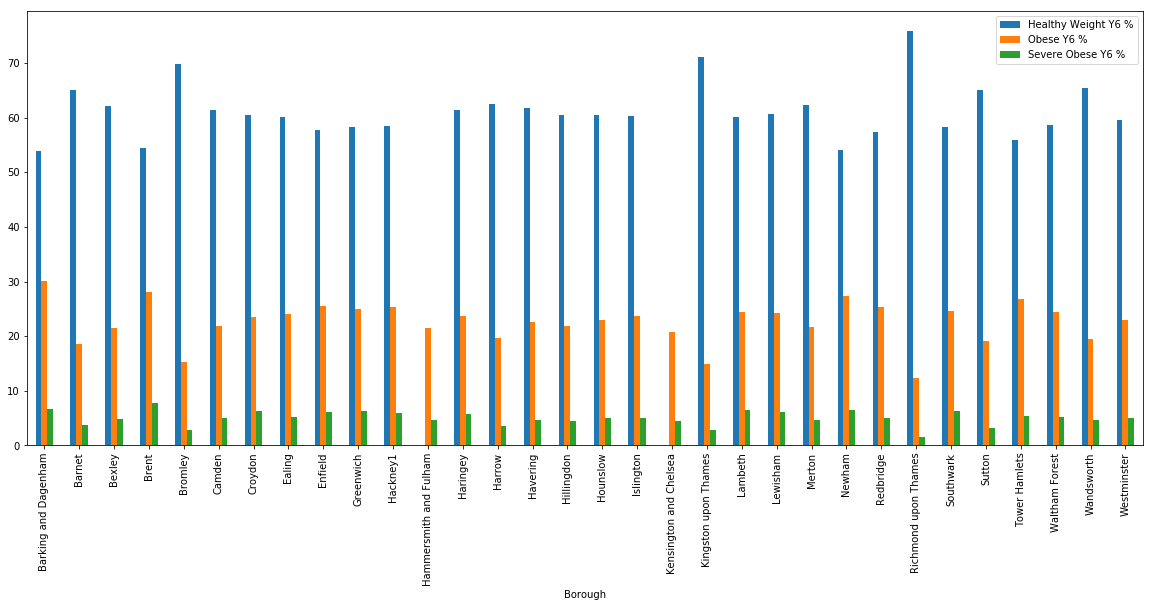

In [189]:
df_obese_chart = df_obese[['Borough', 'Healthy Weight Y6 %', 'Obese Y6 %', 'Severe Obese Y6 %']]
df_obese_chart['Healthy Weight Y6 %'] = pd.to_numeric(df_obese_chart['Healthy Weight Y6 %'], errors='coerce')
df_obese_chart.set_index('Borough', inplace=True)

df_obese_chart.plot.bar(figsize =(20,8))

In [190]:
map_df.drop('Median £ 2016-17', axis=1, inplace=True)
map_df['Obese Y6 %'] = df_obese_chart['Obese Y6 %']

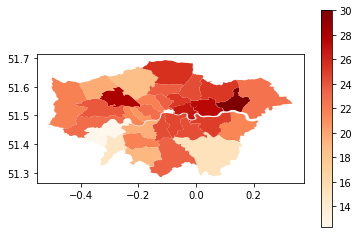

In [197]:
obese_map = map_df.drop('City of London')
obese_map.at['Hackney', 'Obese Y6 %'] = df_obese_chart.at['Hackney1', 'Obese Y6 %']
plot = obese_map.plot(column='Obese Y6 %', cmap='OrRd', legend=True)
fig = plot.get_figure()

In [198]:
#Show the top 10 boroughs based on least Obesity % for Year 6 
df_obese_chart.sort_values(by=['Obese Y6 %', 'Severe Obese Y6 %'], ascending=True, inplace=True)
df_obese_chart.head(10)

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


,Healthy Weight Y6 %,Obese Y6 %,Severe Obese Y6 %
Borough,,,
Richmond upon Thames,75.815085,12.262774,1.508516
Kingston upon Thames,71.154930,14.816901,2.760563
Bromley,69.856322,15.201149,2.844828
Barnet,65.104301,18.593871,3.682720
Sutton,65.020576,19.112940,3.109282
Wandsworth,65.347826,19.521739,4.608696
Harrow,62.458349,19.733432,3.554239
Kensington and Chelsea,NaN,20.775027,4.413348
Hammersmith and Fulham,NaN,21.534847,4.698512


### Smoking
Smoking is another part of the health group of data indicators. The data set provides data on the numbers and percentage of population across different London boroughs over the 3 year period from 2015 to 2017 who are:
1. Current smokers
2. Ex smokers
3. Never smoked

For the purpose of this exercise, I have taken the percentage of population who are smokers and compared it over the 3 year period.

In [199]:
df_smoke = pd.read_excel(smoke_url, sheet_name='Smoking status by borough', skiprows = 3, nrows = 32, header=None )
df_smoke.head()

,0,1,2,3,4,5,6,7,8,9,...,39,40,41,42,43,44,45,46,47,48
0,E09000002,Barking and Dagenham,29000,32000,67000,127000,23,NaN,30000,31000,...,21000,90000,137000,19,NaN,26000,28000,86000,140000,19
1,E09000003,Barnet,49000,77000,154000,280000,18,NaN,48000,80000,...,60000,182000,284000,15,NaN,49000,50000,187000,286000,17
2,E09000004,Bexley,31000,61000,87000,179000,17,NaN,33000,58000,...,46000,109000,177000,13,NaN,22000,48000,117000,187000,12
3,E09000005,Brent,41000,46000,112000,198000,21,NaN,38000,34000,...,35000,168000,233000,13,NaN,36000,35000,160000,231000,16
4,E09000006,Bromley,40000,88000,109000,237000,17,NaN,43000,91000,...,58000,145000,235000,14,NaN,34000,62000,152000,248000,14


In [200]:
cols = list(range(2,32))
c2 = [37,43]
cols.extend(c2)
df_smoke.drop(df_smoke.columns[cols],axis=1,inplace=True)

In [201]:
df_smoke.columns = ['Code', 'Borough', 'Current Smoker 2015', 'Ex Smoker 2015', 'Never Smoked 2015', 'Total 2015', 'Rate % 2015', 
                    'Current Smoker 2016', 'Ex Smoker 2016', 'Never Smoked 2016', 'Total 2016', 'Rate % 2016', 
                    'Current Smoker 2017', 'Ex Smoker 2017', 'Never Smoked 2017', 'Total 2017', 'Rate % 2017']
df_smoke.head()

,Code,Borough,Current Smoker 2015,Ex Smoker 2015,Never Smoked 2015,Total 2015,Rate % 2015,Current Smoker 2016,Ex Smoker 2016,Never Smoked 2016,Total 2016,Rate % 2016,Current Smoker 2017,Ex Smoker 2017,Never Smoked 2017,Total 2017,Rate % 2017
0,E09000002,Barking and Dagenham,25000,30000,79000,134000,19,26000,21000,90000,137000,19,26000,28000,86000,140000,19
1,E09000003,Barnet,40000,78000,158000,276000,14,42000,60000,182000,284000,15,49000,50000,187000,286000,17
2,E09000004,Bexley,26000,71000,86000,182000,14,22000,46000,109000,177000,13,22000,48000,117000,187000,12
3,E09000005,Brent,29000,57000,151000,237000,12,30000,35000,168000,233000,13,36000,35000,160000,231000,16
4,E09000006,Bromley,33000,92000,109000,233000,14,32000,58000,145000,235000,14,34000,62000,152000,248000,14


/opt/conda/envs/Python36/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://panda

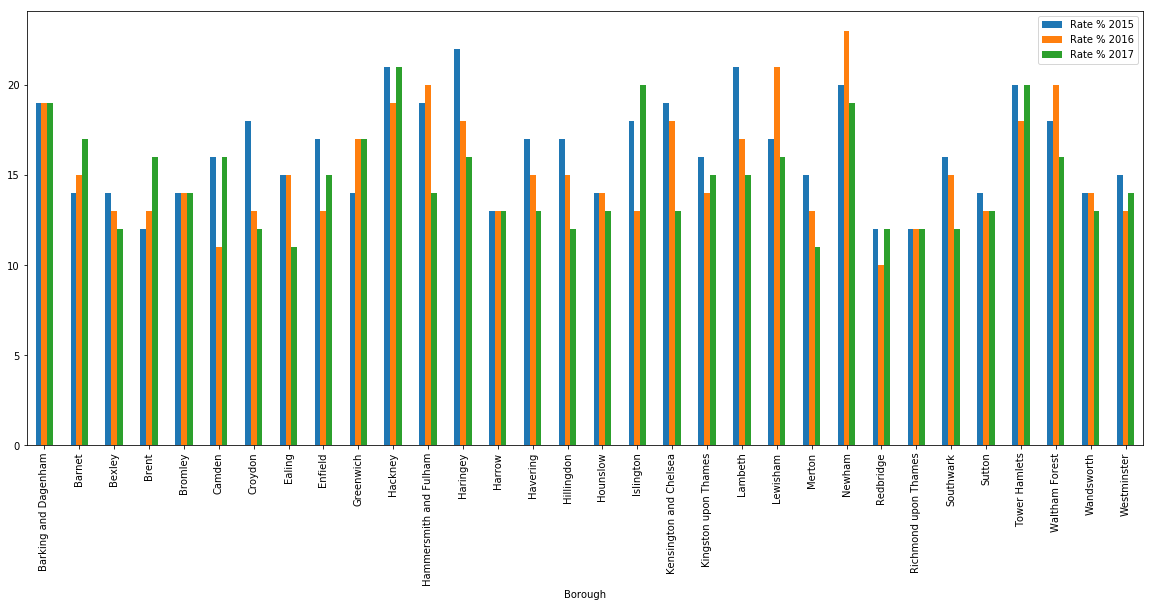

In [202]:
df_smoke_chart = df_smoke[['Borough', 'Rate % 2015', 'Rate % 2016', 'Rate % 2017']]

#Repeat values for missing data
df_smoke_chart.iloc[13,2:4] = 13
df_smoke_chart.iloc[25,3] = 12

#Change data type to int
df_smoke_chart['Rate % 2016'] = df_smoke_chart['Rate % 2016'].astype(int)
df_smoke_chart['Rate % 2017'] = df_smoke_chart['Rate % 2017'].astype(int)

#Set index to the boroughs
df_smoke_chart.set_index('Borough', inplace=True)

#Plot the bar chart
df_smoke_chart.plot.bar(figsize =(20,8))

In [203]:
map_df.drop('Obese Y6 %', axis=1, inplace=True)
map_df['Smoke Rate % 2017'] = df_smoke_chart['Rate % 2017']

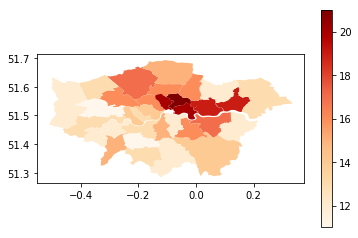

In [206]:
smoke_map = map_df.drop('City of London')
plot = smoke_map.plot(column='Smoke Rate % 2017', cmap='OrRd', legend=True)
fig = plot.get_figure()

In [207]:
#Show the top 10 boroughs based on least Smoking population % for 2017
df_smoke_chart.sort_values(by=['Rate % 2017', 'Rate % 2016'], ascending=True, inplace=True)
df_smoke_chart.head(10)

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


,Rate % 2015,Rate % 2016,Rate % 2017
Borough,,,
Merton,15,13,11
Ealing,15,15,11
Redbridge,12,10,12
Richmond upon Thames,12,12,12
Bexley,14,13,12
Croydon,18,13,12
Hillingdon,17,15,12
Southwark,16,15,12
Harrow,13,13,13


### Wellbeing
Wellbeing is another part of the health group of data indicators covering the mental health aspect of the population. The data set provides data on the scores (out of 10) for four different aspects of wellbeing of the population across different London boroughs over the 2 year period from 2015-16 to 2016-17. The aspects are:
1. Life Satisfaction Mean score
2. Worthwhile Mean score
3. Happiness Mean score
4. Anxiety Mean score

For the purpose of this exercise, I have taken all four measures for visualisation in the bar chart for the year 2016-17 and particular focus on Happiness Mean score for 2016-17 in the heatmap.

In [208]:
df_wellbeing = pd.read_excel(wellbeing_url, sheet_name='Summary - Mean Scores', skiprows = 4, nrows = 32, header=None )
df_wellbeing.head()

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,28
0,E09000002,Barking and Dagenham,7.05,7.09,7.01,7.32,7.45,7.50,NaN,7.49,...,7.26,7.45,7.38,NaN,3.23,3.27,3.39,3.15,2.84,3.02
1,E09000003,Barnet,7.43,7.28,7.40,7.54,7.53,7.47,NaN,7.70,...,7.44,7.62,7.63,NaN,3.41,2.74,2.60,2.37,2.49,3.09
2,E09000004,Bexley,7.42,7.42,7.28,7.52,7.41,7.46,NaN,7.68,...,7.38,7.29,7.45,NaN,3.07,3.24,3.46,3.16,3.06,3.16
3,E09000005,Brent,7.11,7.28,7.41,7.24,7.55,7.67,NaN,7.20,...,7.32,7.53,7.59,NaN,2.77,3.29,3.07,2.50,2.57,2.69
4,E09000006,Bromley,7.50,7.60,7.53,7.71,7.54,7.60,NaN,7.84,...,7.48,7.51,7.34,NaN,3.30,3.22,3.15,2.76,2.98,3.29


In [209]:
cols = [2,3,4,5,8,9,10,11,12,15,16,17,18,19,22,23,24,25,26]
df_wellbeing.drop(df_wellbeing.columns[cols],axis=1,inplace=True)
df_wellbeing.columns = ['Code', 'Borough', 'Life Satisfaction Mean 2015-16', 'Life Satisfaction Mean 2016-17', 'Worthwhile Mean 2015-16', 
                    'Worthwhile Mean 2016-17', 'Happiness Mean 2015-16', 'Happiness Mean 2016-17', 'Anxiety Mean 2015-16', 'Anxiety Mean 2016-17'] 
df_wellbeing.head()

,Code,Borough,Life Satisfaction Mean 2015-16,Life Satisfaction Mean 2016-17,Worthwhile Mean 2015-16,Worthwhile Mean 2016-17,Happiness Mean 2015-16,Happiness Mean 2016-17,Anxiety Mean 2015-16,Anxiety Mean 2016-17
0,E09000002,Barking and Dagenham,7.45,7.50,7.81,7.74,7.45,7.38,2.84,3.02
1,E09000003,Barnet,7.53,7.47,7.92,7.83,7.62,7.63,2.49,3.09
2,E09000004,Bexley,7.41,7.46,7.79,7.82,7.29,7.45,3.06,3.16
3,E09000005,Brent,7.55,7.67,7.61,7.68,7.53,7.59,2.57,2.69
4,E09000006,Bromley,7.54,7.60,7.81,7.65,7.51,7.34,2.98,3.29


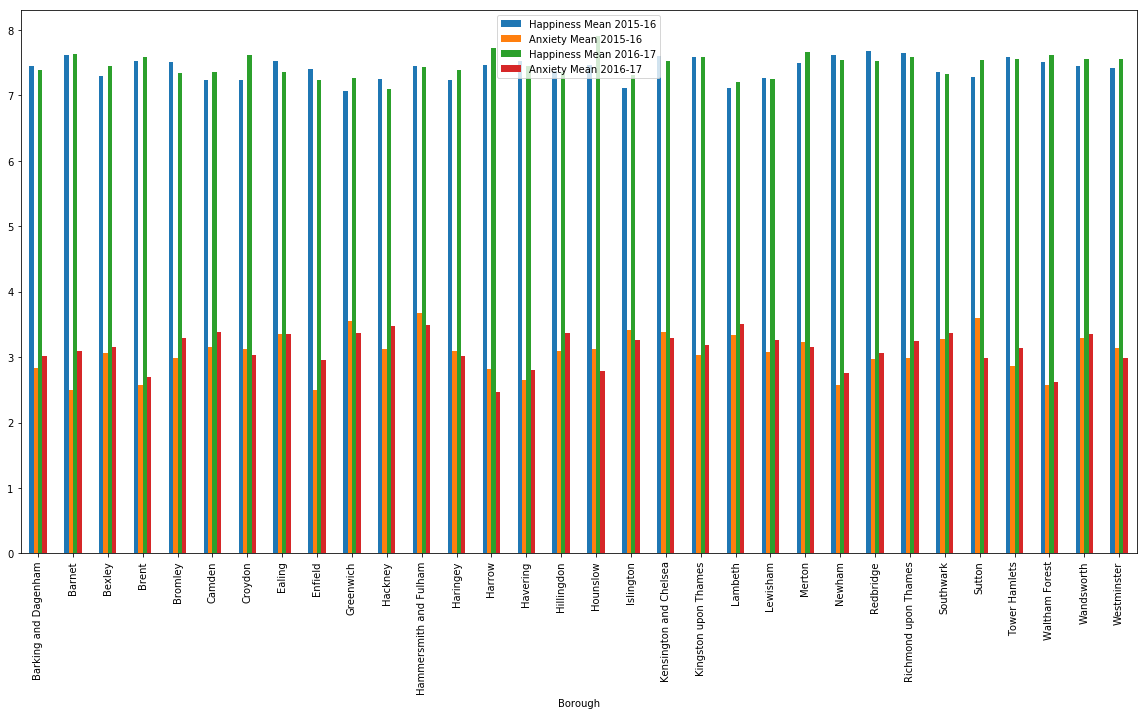

In [210]:
#Taking only Happiness and Anxiety measures
df_well_chart = df_wellbeing[['Borough', 'Happiness Mean 2015-16','Anxiety Mean 2015-16','Happiness Mean 2016-17', 'Anxiety Mean 2016-17']]

#Set index to the boroughs
df_well_chart.set_index('Borough', inplace=True)

#Plot the bar chart
df_well_chart.plot.bar(figsize =(20,10))

In [211]:
map_df.drop('Smoke Rate % 2017', axis=1, inplace=True)
map_df['Happiness Mean 2016-17'] = df_well_chart['Happiness Mean 2016-17']

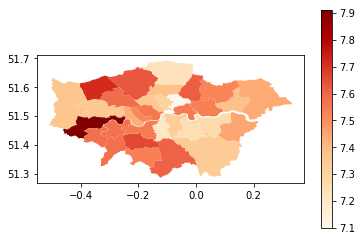

In [212]:
well_map = map_df.drop('City of London')
plot = well_map.plot(column='Happiness Mean 2016-17', cmap='OrRd', legend=True)
fig = plot.get_figure()

In [213]:
#Show the top 10 boroughs based on Happiness % for 2016-17
df_well_chart.sort_values(by=['Happiness Mean 2016-17', 'Happiness Mean 2015-16'], ascending=False, inplace=True)
df_well_chart.head(10)

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


,Happiness Mean 2015-16,Anxiety Mean 2015-16,Happiness Mean 2016-17,Anxiety Mean 2016-17
Borough,,,,
Hounslow,7.47,3.13,7.91,2.79
Harrow,7.46,2.82,7.72,2.47
Merton,7.50,3.23,7.66,3.15
Barnet,7.62,2.49,7.63,3.09
Waltham Forest,7.51,2.58,7.62,2.62
Croydon,7.23,3.12,7.61,3.03
Brent,7.53,2.57,7.59,2.69
Richmond upon Thames,7.65,2.99,7.58,3.25
Kingston upon Thames,7.59,3.03,7.58,3.19


### Sports Participation
Sports Participation frequency is another part of the health group of data indicators covering the active population that participated in any sport and the frequency of such participation for the period between 2014-15 and 2015-16.  The data set covers the following frequency: 
1. Three times per week (numbers and percentage)
2. Once per week (numbers and percentage)
3. No sport participation (numbers and percentage)

For the purpose of this exercise, I have taken the data from 3 different excel spreadsheets and merged the data into a single data frame. For visualisation, I considered only the active population - i.e. participating with frequency at least once per week across both the years.

In [214]:
df_sp1 = pd.read_excel(sports_part_url, sheet_name='1 per week', skiprows = 14, nrows = 32, header=None)
df_sp2 = pd.read_excel(sports_part_url, sheet_name='3 per week', skiprows = 14, nrows = 32, header=None)
df_sp3 = pd.read_excel(sports_part_url, sheet_name='No sport', skiprows = 14, nrows = 32, header=None)
cols = list(range(3,19))
c1 = [1]
cols.extend(c1)
df_sp1.drop(df_sp1.columns[cols],axis=1,inplace=True)
df_sp1.columns = ['Code', 'Borough', '1 per week 2014-15 %', '1 per week nos 2014-15', '1 per week 2015-16 %', '1 per week nos 2015-16'] 
df_sp1.head()

,Code,Borough,1 per week 2014-15 %,1 per week nos 2014-15,1 per week 2015-16 %,1 per week nos 2015-16
0,E09000002,Barking and Dagenham,0.265,38300,0.248,36400
1,E09000003,Barnet,0.377,111200,0.402,120000
2,E09000004,Bexley,0.332,63100,0.372,71300
3,E09000005,Brent,0.313,79400,0.321,82000
4,E09000006,Bromley,0.428,110000,0.424,110100


In [215]:
df_sp2.drop(df_sp2.columns[cols],axis=1,inplace=True)
df_sp2.columns = ['Code', 'Borough', '3 per week 2014-15 %', '3 per week nos 2014-15', '3 per week 2015-16 %', '3 per week nos 2015-16'] 
df_sp2.head()

,Code,Borough,3 per week 2014-15 %,3 per week nos 2014-15,3 per week 2015-16 %,3 per week nos 2015-16
0,E09000002,Barking and Dagenham,0.141,20400,0.138,20300
1,E09000003,Barnet,0.181,53400,0.177,53000
2,E09000004,Bexley,0.147,28000,0.199,38200
3,E09000005,Brent,0.124,31500,0.152,39000
4,E09000006,Bromley,0.213,54700,0.188,48900


In [216]:
df_sp3.drop(df_sp3.columns[cols],axis=1,inplace=True)
df_sp3.columns = ['Code', 'Borough', 'No sport 2014-15 %', 'No sport nos 2014-15', 'No sport 2015-16 %', 'No sport nos 2015-16'] 
df_sp3.head()
#df_sport = pd.concat([df_sp1, df_sp2, df_sp3])
#df_sport.head()

,Code,Borough,No sport 2014-15 %,No sport nos 2014-15,No sport 2015-16 %,No sport nos 2015-16
0,E09000002,Barking and Dagenham,0.636,92200,0.670,98800
1,E09000003,Barnet,0.556,164700,0.493,147900
2,E09000004,Bexley,0.579,110400,0.542,104500
3,E09000005,Brent,0.606,154200,0.572,146800
4,E09000006,Bromley,0.455,117400,0.474,123600


In [217]:
df_sport = pd.merge(df_sp1, df_sp2, on='Code')
df_sport.head()

,Code,Borough_x,1 per week 2014-15 %,1 per week nos 2014-15,1 per week 2015-16 %,1 per week nos 2015-16,Borough_y,3 per week 2014-15 %,3 per week nos 2014-15,3 per week 2015-16 %,3 per week nos 2015-16
0,E09000002,Barking and Dagenham,0.265,38300,0.248,36400,Barking and Dagenham,0.141,20400,0.138,20300
1,E09000003,Barnet,0.377,111200,0.402,120000,Barnet,0.181,53400,0.177,53000
2,E09000004,Bexley,0.332,63100,0.372,71300,Bexley,0.147,28000,0.199,38200
3,E09000005,Brent,0.313,79400,0.321,82000,Brent,0.124,31500,0.152,39000
4,E09000006,Bromley,0.428,110000,0.424,110100,Bromley,0.213,54700,0.188,48900


In [218]:
df_sport = pd.merge(df_sport, df_sp3, on='Code')
df_sport.head()

,Code,Borough_x,1 per week 2014-15 %,1 per week nos 2014-15,1 per week 2015-16 %,1 per week nos 2015-16,Borough_y,3 per week 2014-15 %,3 per week nos 2014-15,3 per week 2015-16 %,3 per week nos 2015-16,Borough,No sport 2014-15 %,No sport nos 2014-15,No sport 2015-16 %,No sport nos 2015-16
0,E09000002,Barking and Dagenham,0.265,38300,0.248,36400,Barking and Dagenham,0.141,20400,0.138,20300,Barking and Dagenham,0.636,92200,0.670,98800
1,E09000003,Barnet,0.377,111200,0.402,120000,Barnet,0.181,53400,0.177,53000,Barnet,0.556,164700,0.493,147900
2,E09000004,Bexley,0.332,63100,0.372,71300,Bexley,0.147,28000,0.199,38200,Bexley,0.579,110400,0.542,104500
3,E09000005,Brent,0.313,79400,0.321,82000,Brent,0.124,31500,0.152,39000,Brent,0.606,154200,0.572,146800
4,E09000006,Bromley,0.428,110000,0.424,110100,Bromley,0.213,54700,0.188,48900,Bromley,0.455,117400,0.474,123600


In [219]:
cols = [6,11]
df_sport.drop(df_sport.columns[cols],axis=1,inplace=True)
df_sport.head()

,Code,Borough_x,1 per week 2014-15 %,1 per week nos 2014-15,1 per week 2015-16 %,1 per week nos 2015-16,3 per week 2014-15 %,3 per week nos 2014-15,3 per week 2015-16 %,3 per week nos 2015-16,No sport 2014-15 %,No sport nos 2014-15,No sport 2015-16 %,No sport nos 2015-16
0,E09000002,Barking and Dagenham,0.265,38300,0.248,36400,0.141,20400,0.138,20300,0.636,92200,0.670,98800
1,E09000003,Barnet,0.377,111200,0.402,120000,0.181,53400,0.177,53000,0.556,164700,0.493,147900
2,E09000004,Bexley,0.332,63100,0.372,71300,0.147,28000,0.199,38200,0.579,110400,0.542,104500
3,E09000005,Brent,0.313,79400,0.321,82000,0.124,31500,0.152,39000,0.606,154200,0.572,146800
4,E09000006,Bromley,0.428,110000,0.424,110100,0.213,54700,0.188,48900,0.455,117400,0.474,123600


In [220]:
df_sport.rename(columns={"Borough_x": "Borough"}, inplace=True)
df_sport.head()

,Code,Borough,1 per week 2014-15 %,1 per week nos 2014-15,1 per week 2015-16 %,1 per week nos 2015-16,3 per week 2014-15 %,3 per week nos 2014-15,3 per week 2015-16 %,3 per week nos 2015-16,No sport 2014-15 %,No sport nos 2014-15,No sport 2015-16 %,No sport nos 2015-16
0,E09000002,Barking and Dagenham,0.265,38300,0.248,36400,0.141,20400,0.138,20300,0.636,92200,0.670,98800
1,E09000003,Barnet,0.377,111200,0.402,120000,0.181,53400,0.177,53000,0.556,164700,0.493,147900
2,E09000004,Bexley,0.332,63100,0.372,71300,0.147,28000,0.199,38200,0.579,110400,0.542,104500
3,E09000005,Brent,0.313,79400,0.321,82000,0.124,31500,0.152,39000,0.606,154200,0.572,146800
4,E09000006,Bromley,0.428,110000,0.424,110100,0.213,54700,0.188,48900,0.455,117400,0.474,123600


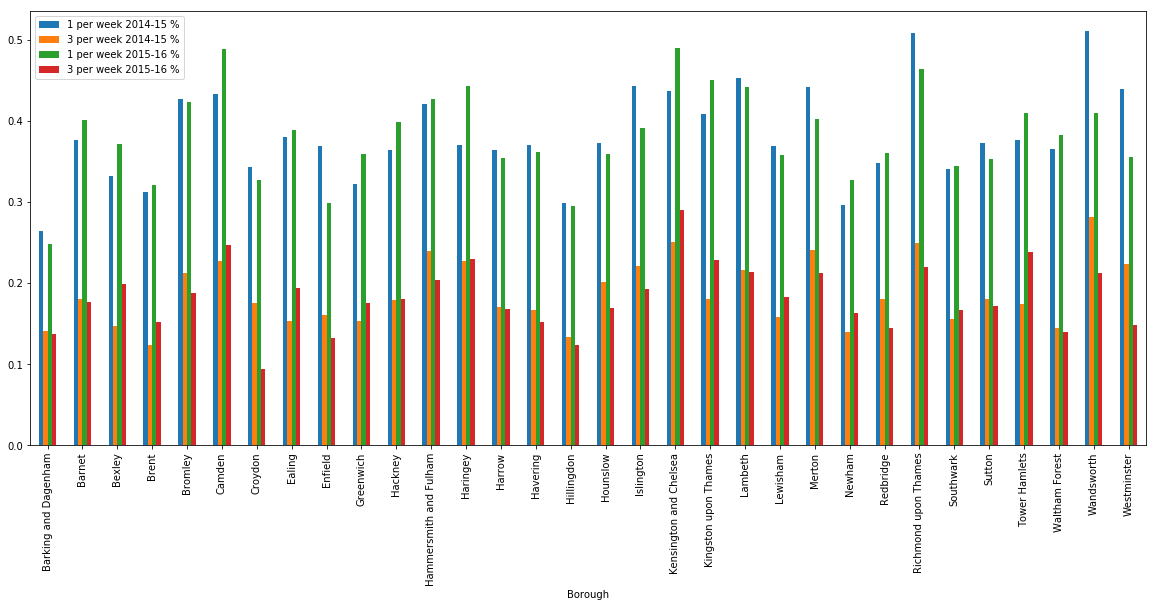

In [221]:
#Taking only active percentage figures for visualisation
df_sport_chart = df_sport[['Borough', '1 per week 2014-15 %', '3 per week 2014-15 %', '1 per week 2015-16 %', '3 per week 2015-16 %']]

#Set index to the boroughs
df_sport_chart.set_index('Borough', inplace=True)

#Plot the bar chart
df_sport_chart.plot.bar(figsize =(20,8))

In [222]:
map_df.drop('Happiness Mean 2016-17', axis=1, inplace=True)
map_df['Sports 3 per week 2015-16 %'] = df_sport_chart['3 per week 2015-16 %']

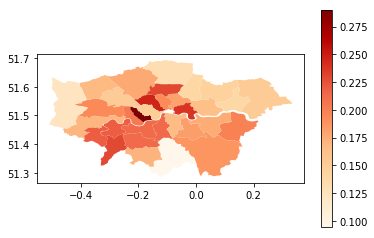

In [224]:
sport_map = map_df.drop('City of London')
plot = sport_map.plot(column='Sports 3 per week 2015-16 %', cmap='OrRd', legend=True)
fig = plot.get_figure()

In [225]:
#Show the top 10 boroughs based on most active population (sports - 3x a week)
df_sport_chart.sort_values(by=['3 per week 2015-16 %', '3 per week 2014-15 %'], ascending=False, inplace=True)
df_sport_chart.head(10)

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


,1 per week 2014-15 %,3 per week 2014-15 %,1 per week 2015-16 %,3 per week 2015-16 %
Borough,,,,
Kensington and Chelsea,0.437,0.251,0.490,0.290
Camden,0.433,0.228,0.489,0.247
Tower Hamlets,0.377,0.174,0.410,0.239
Haringey,0.371,0.228,0.444,0.230
Kingston upon Thames,0.409,0.181,0.451,0.229
Richmond upon Thames,0.509,0.250,0.465,0.220
Lambeth,0.453,0.216,0.442,0.214
Wandsworth,0.511,0.282,0.410,0.213
Merton,0.442,0.241,0.403,0.213


### Homelessness
I have considered Homelessness  as a part of the socio-economic group to look into the economic inequality and action taken by the London boroughs on the same. The data corresponds to the year 2017-18 and I have taken two main data points for comparison:
1. Number of priority homeless (per 1000 households)
2. Number of households accommodated by the Local Authority (Borough) (per 1000 households)   

In [226]:
df_home1 = pd.read_excel(homeless_url, sheet_name='2017-18', skiprows = 10, nrows = 14, header=None)
df_home2 = pd.read_excel(homeless_url, sheet_name='2017-18', skiprows = 26, nrows = 19, header=None)
df_homeless = pd.concat([df_home1, df_home2], ignore_index=True)
df_homeless.head()

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,E09000007,NaN,Camden,NaN,111.774,NaN,37,20,25,--,...,132,NaN,22,29,15,134,195,395,3.53,36
1,E09000001,NaN,City of London,NaN,5.084,NaN,--,--,--,--,...,19,NaN,--,--,--,--,--,15,2.95,--
2,E09000012,NaN,Hackney,NaN,118.029,NaN,140,195,40,13,...,1344,NaN,291,747,499,195,1129,2861,24.24,467
3,E09000013,NaN,Hammersmith and Fulham,NaN,83.415,NaN,95,74,29,--,...,329,NaN,146,8,244,998,6,1402,16.81,--
4,E09000014,NaN,Haringey,NaN,116.963,NaN,28,161,20,19,...,827,NaN,--,--,355,1057,1466,2943,25.16,5


In [227]:
c1 = list(range(5,13))
c2 = list(range(14,26))
c3 = [1,3,27]
cols = c1 + c2 + c3
df_homeless.drop(df_homeless.columns[cols],axis=1,inplace=True)
df_homeless.head()

,0,2,4,13,26
0,E09000007,Camden,111.774,0.84,3.53
1,E09000001,City of London,5.084,1.38,2.95
2,E09000012,Hackney,118.029,8.04,24.24
3,E09000013,Hammersmith and Fulham,83.415,2.99,16.81
4,E09000014,Haringey,116.963,3.38,25.16


In [228]:
df_homeless.columns = ['Code', 'Borough', 'No of households (000s)', 
                  'Nos priority homeless (per 1000 households)', 
                  'Households accommodated by authority (per 1000 households)'] 
df_homeless.sort_values(by='Code', ascending=True, inplace=True)
df_homeless.head()

,Code,Borough,No of households (000s),Nos priority homeless (per 1000 households),Households accommodated by authority (per 1000 households)
1,E09000001,City of London,5.084,1.38,2.95
14,E09000002,Barking and Dagenham,78.629,6.51,23.86
15,E09000003,Barnet,154.401,2.88,16.70
16,E09000004,Bexley,99.160,5.04,12.44
17,E09000005,Brent,123.950,4.32,19.77


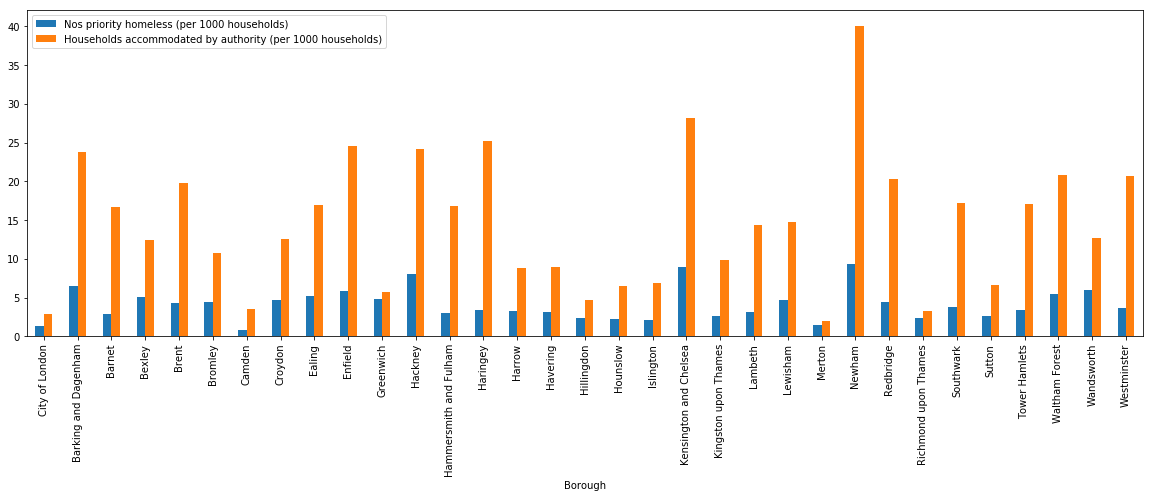

In [229]:
#Leaving out the number of households for visualisation
df_homeless_chart = df_homeless[['Borough', 'Nos priority homeless (per 1000 households)', 'Households accommodated by authority (per 1000 households)']]

#Set index to the boroughs
df_homeless_chart.set_index('Borough', inplace=True)

#Plot the bar chart
df_homeless_chart.plot.bar(figsize =(20,6))

In [230]:
map_df.drop('Sports 3 per week 2015-16 %', axis=1, inplace=True)
map_df['Nos priority homeless (per 1000 households)'] = df_homeless_chart['Nos priority homeless (per 1000 households)']

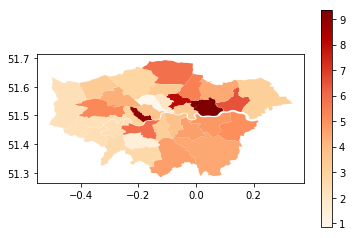

In [231]:
plot = map_df.plot(column='Nos priority homeless (per 1000 households)', cmap='OrRd', legend=True)
fig = plot.get_figure()

In [232]:
#Show the top 10 boroughs based on number of priority homesless per 1000 households
df_homeless_chart.sort_values(by=['Nos priority homeless (per 1000 households)'], ascending=True, inplace=True)
df_homeless_chart.head(10)

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


,Nos priority homeless (per 1000 households),Households accommodated by authority (per 1000 households)
Borough,,
Camden,0.84,3.53
City of London,1.38,2.95
Merton,1.44,1.94
Islington,2.06,6.90
Hounslow,2.29,6.51
Hillingdon,2.32,4.69
Richmond upon Thames,2.40,3.27
Kingston upon Thames,2.67,9.91
Sutton,2.69,6.64


### Vehicles
I have considered Vehicles as a part of the socio-economic group to look into the economic difference as measured by the number of vehicles owned by households in London boroughs. The data corresponds to the year 2018 and has the following categories of data:
1. Number of cars - owned by company or privately
2. Number of other light goods vehicles - owned by company or privately
3. Any exempt (disabled) vehicles - cars / others

For the purpose of this exercise, I have considered the Total Private or Light Goods vehicles (PLGs) to chart a simple bar graph across the various London boroughs.   

In [233]:
df_vehicles = pd.read_excel(vehicles_url, sheet_name = '2018', skiprows = 3, nrows = 33, header=None)
df_vehicles.head()

,0,1,2,3,4,5,6,7,8
0,00AA,City of London,863,1304,321,42,2530,83,7
1,00AB,Barking and Dagenham,1944,59294,2889,3728,67855,2452,265
2,00AC,Barnet,5009,132377,4410,5486,147282,3176,137
3,00AD,Bexley,2508,99393,4475,6187,112563,2865,241
4,00AE,Brent,5279,83426,5044,4118,97867,2792,73


In [234]:
df_vehicles.columns = ['Code', 'Borough', 'PLG cars - Company', 'PLG cars - Private', 'PLG other - Company', 'PLG other - Private',
                       'Total PLG', 'Exempt disabled - cars', 'Exempt disabled - others']
df_vehicles.head()

,Code,Borough,PLG cars - Company,PLG cars - Private,PLG other - Company,PLG other - Private,Total PLG,Exempt disabled - cars,Exempt disabled - others
0,00AA,City of London,863,1304,321,42,2530,83,7
1,00AB,Barking and Dagenham,1944,59294,2889,3728,67855,2452,265
2,00AC,Barnet,5009,132377,4410,5486,147282,3176,137
3,00AD,Bexley,2508,99393,4475,6187,112563,2865,241
4,00AE,Brent,5279,83426,5044,4118,97867,2792,73


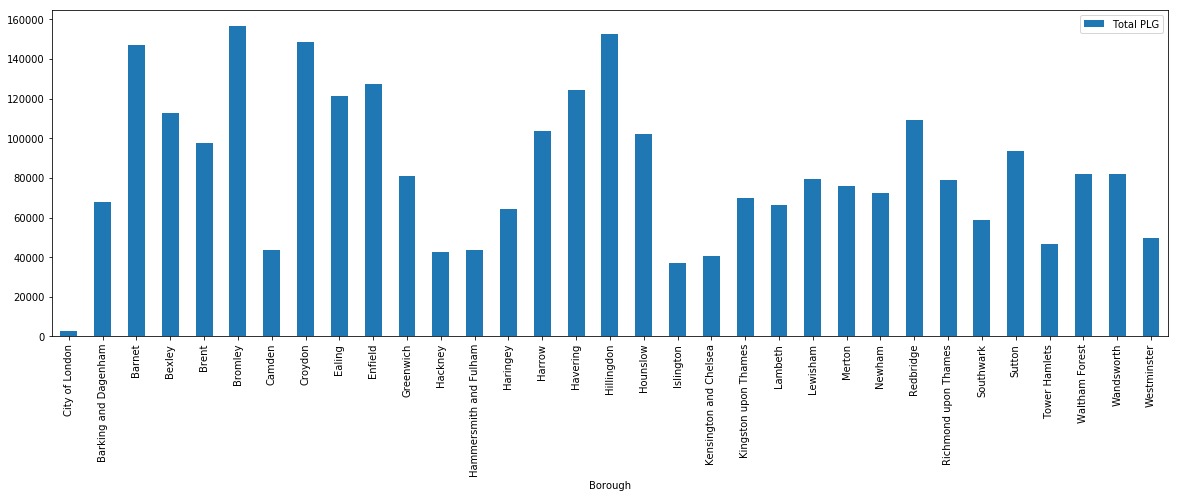

In [235]:
df_vehicle_chart = df_vehicles[['Borough', 'Total PLG']]

#Set index to the boroughs
df_vehicle_chart.set_index('Borough', inplace=True)

#Plot the bar chart
df_vehicle_chart.plot.bar(figsize =(20,6))

In [236]:
map_df.drop('Nos priority homeless (per 1000 households)', axis=1, inplace=True)
map_df['Total PLG'] = df_vehicle_chart['Total PLG']

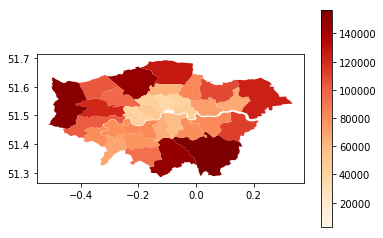

In [237]:
plot = map_df.plot(column='Total PLG', cmap='OrRd', legend=True)
fig = plot.get_figure()

In [238]:
#Show the top 10 boroughs based on private vehicles
df_vehicle_chart.sort_values(by=['Total PLG'], ascending=False, inplace=True)
df_vehicle_chart.head(10)

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


,Total PLG
Borough,
Bromley,156765
Hillingdon,152602
Croydon,148620
Barnet,147282
Enfield,127375
Havering,124564
Ealing,121257
Bexley,112563
Redbridge,109045


### Walking / Cycling
I have considered Walking / Cycling as a health group to look into the active population that walk or exercise on different frequencies across the different London boroughs over the time period between 2010-11 to 2016-17. The data has the figures corresponding to the following frequencies:
1. Once per month (walking, cycling)
2. Once per week (walking, cycling)
3. Three times per week (walking, cycling)
4. Five times per week (walking, cycling) 

For the purpose of this exercise, I have considered the data only for the last two years - 2015-16 and 2016-17. Further, I have only considered the very active population - i.e. those that walk or cycle at 3 or 5 times per week and have shown the visualisation by two bar graphs for 2015-16 and 2016-17.  

In [21]:
df_walk_cycle = pd.read_csv(walk_cycle_url)
df_walk_cycle.head()

,LA code,Local Authority,Year,Frequency,Walking_%,Cycling_%
0,E09000001,City of London,2010/11,1x per month,78,30
1,E09000002,Barking and Dagenham,2010/11,1x per month,60,8
2,E09000003,Barnet,2010/11,1x per month,65,10
3,E09000004,Bexley,2010/11,1x per month,65,11
4,E09000005,Brent,2010/11,1x per month,62,14


In [22]:
# Remove older data - keep data only for the last 2 years available - 2015/16 to 2016/17
remove_years = ['2010/11', '2011/12', '2012/13', '2013/14', '2014/15']
df_walk_cycle.drop(df_walk_cycle[df_walk_cycle.Year.isin(remove_years)].index.tolist(), inplace=True)

#Remove non London data
remove_list = ['E12000001', 'E12000002', 'E12000003', 'E12000004', 'E12000005', 'E12000006', 'E12000007', 'E12000008', 'E12000009', 'E92000001']
df_walk_cycle.drop(df_walk_cycle[df_walk_cycle['LA code'].isin(remove_list)].index.tolist(), inplace=True)

#Taking only the very active data - 3x per week and 5x per week
remove_freq = ['1x per month', '1x per week']
df_walk_cycle.drop(df_walk_cycle[df_walk_cycle['Frequency'].isin(remove_freq)].index.tolist(), inplace=True)


#df_walk_cycle.set_index('Local Authority', inplace=True)
#df_walk_cycle.sort_values(by='LA code', ascending=True, axis=1, inplace=True)
df_walk_cycle.drop('LA code', axis=1, inplace=True)
df_walk_cycle['Cycling_%'] = df_walk_cycle['Cycling_%'].astype(int)
df_walk_cycle.head()

,Local Authority,Year,Frequency,Walking_%,Cycling_%
946,City of London,2015/16,3x per week,60,9
947,Barking and Dagenham,2015/16,3x per week,32,3
948,Barnet,2015/16,3x per week,42,3
949,Bexley,2015/16,3x per week,44,1
950,Brent,2015/16,3x per week,39,3


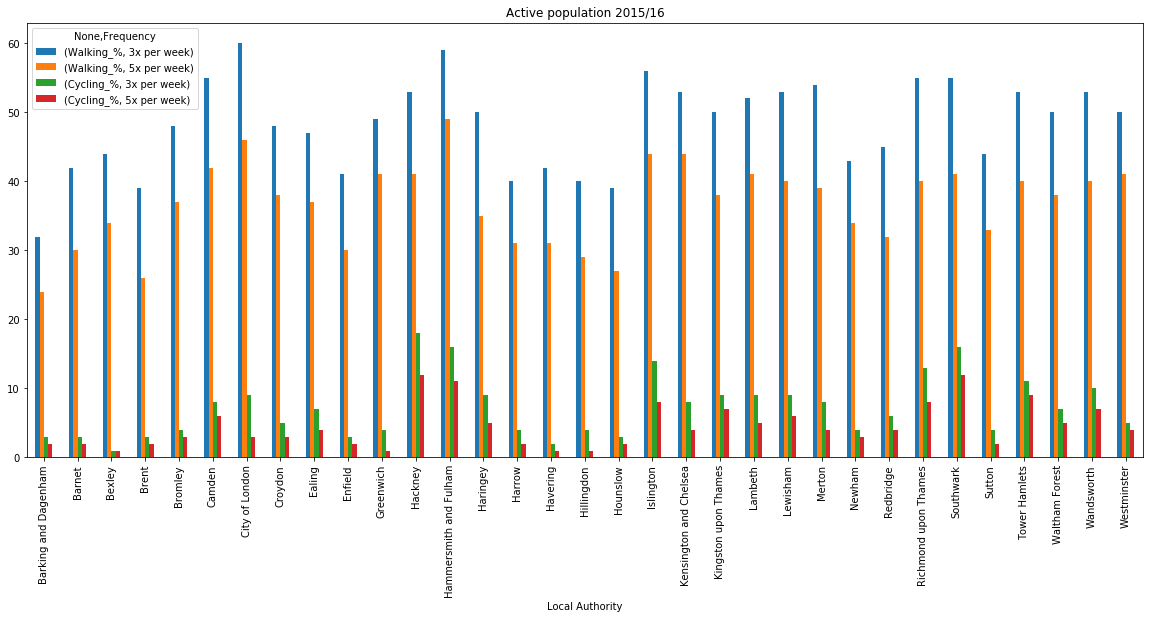

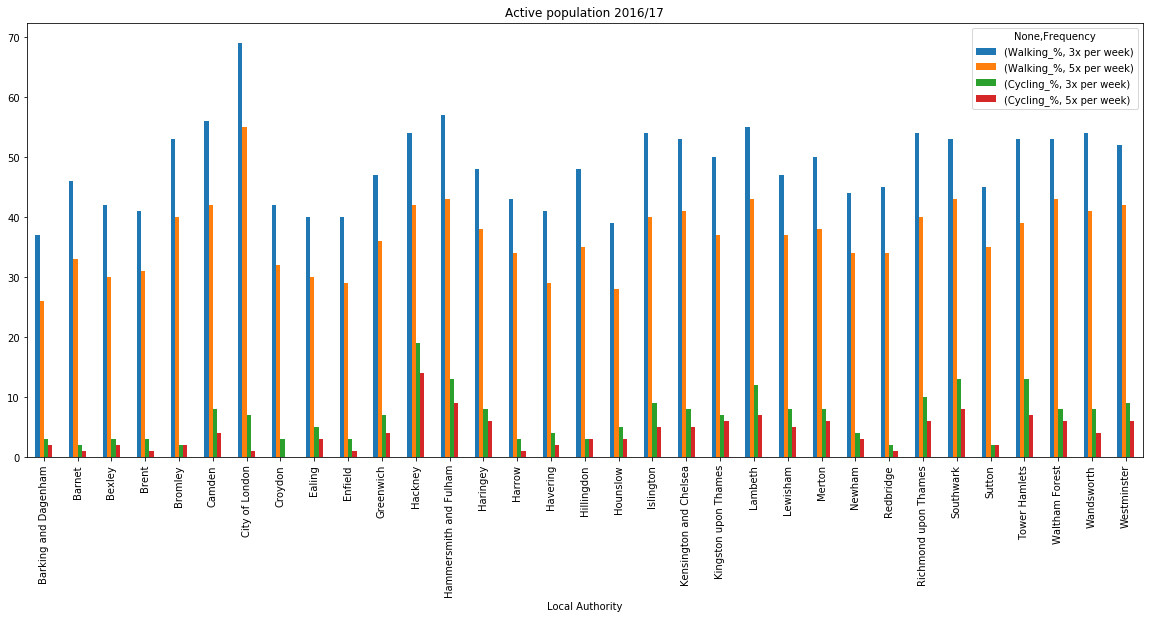

In [23]:
# get data for plotting
chart2016 = df_walk_cycle.loc[df_walk_cycle['Year']== '2015/16']
chart2016 =chart2016[['Local Authority', 'Frequency', 'Walking_%', 'Cycling_%']]


chart2017 = df_walk_cycle.loc[df_walk_cycle['Year']== '2016/17']
chart2017 = chart2017[['Local Authority', 'Frequency', 'Walking_%', 'Cycling_%']]


pivot_2016 = chart2016.pivot(index='Local Authority', columns='Frequency', values=['Walking_%', 'Cycling_%'])
pivot_2016.plot.bar(title='Active population 2015/16', figsize=(20,8))

pivot_2017 = chart2017.pivot(index='Local Authority', columns='Frequency', values=['Walking_%', 'Cycling_%'])
pivot_2017.plot.bar(title='Active population 2016/17', figsize=(20,8))

In [41]:
#Show the top 10 boroughs based on most active population - walking 5x a week
chart2017_5x = chart2017.loc[chart2017['Frequency']== '5x per week']
chart2017_5x = chart2017_5x[['Walking_%', 'Cycling_%']]
chart2017_5x.sort_values('Walking_%', ascending=False, inplace=True)
chart2017_5x.head(10)

,Walking_%,Cycling_%
Local Authority,,
City of London,55,1
Waltham Forest,43,6
Southwark,43,8
Lambeth,43,7
Hammersmith and Fulham,43,9
Hackney,42,14
Westminster,42,6
Camden,42,4
Wandsworth,41,4


### Public Transport Access
PTALS are a detailed and accurate measure of the accessibility of a point to the public transport network, taking into account walk access time and service availability. The method is essentially a way of measuring the density of the public transport network at any location within Greater London. Each area is graded between 0 and 6b, where a score of 0 is very poor access to public transport, and 6b is excellent access to public transport.

The measure reflects:
1. Walking time from the point-of interest to the public transport access points;
2. The reliability of the service modes available;
3. The number of services available within the catchment; and
4. The level of service at the public transport access points - i.e. average waiting time.

For the purpose of this exercise, I have taken the Average PTAI scores and plotted the same across the London boroughs. Also, since City of London borough is very small and extremely well connected, it skews the data set - I have removed the same for the purpose of illustration in the heat map.

In [45]:
df_public_transport_access = pd.read_csv(ptal_url)
df_public_transport_access.head()

,Borough Code,Borough Name,AvPTAI2015,PTAL
0,E09000021,Kingston upon Thames,5.425275,2
1,E09000008,Croydon,6.757744,2
2,E09000006,Bromley,3.592084,1b
3,E09000018,Hounslow,5.842208,2
4,E09000009,Ealing,8.503510,2


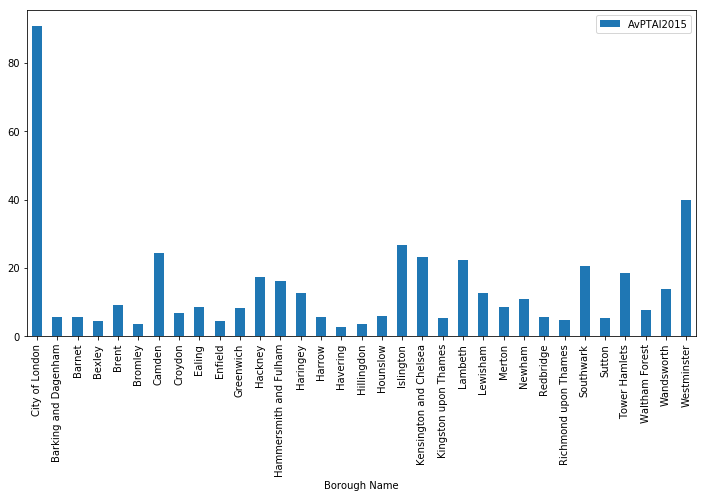

In [46]:
df_public_transport_access.sort_values(by='Borough Code', ascending=True, inplace=True)
df_public_transport_access.set_index('Borough Name', inplace=True)
df_public_transport_access.plot.bar(figsize=(12,6))

In [47]:
map_df.drop('Walking_% 5x 2016/17', axis=1, inplace=True)
map_df['Avg PTA'] = df_public_transport_access['AvPTAI2015']

In [51]:
ptal_map = map_df.drop('City of London')

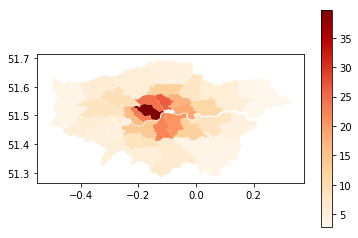

In [52]:
plot = ptal_map.plot(column='Avg PTA', cmap='OrRd', legend=True)
fig = plot.get_figure()

In [50]:
#Show the top 10 boroughs based on Public Transport Accessibility (removing City of London due to data skew)
df_rep_ptal = df_public_transport_access.drop('City of London')
df_rep_ptal.sort_values(by=['AvPTAI2015'], ascending=False, inplace=True)
df_rep_ptal.head(10)

,Borough Code,AvPTAI2015,PTAL
Borough Name,,,
Westminster,E09000033,39.750796,6a
Islington,E09000019,26.667566,6a
Camden,E09000007,24.316782,5
Kensington and Chelsea,E09000020,23.262691,5
Lambeth,E09000022,22.239912,5
Southwark,E09000028,20.513884,5
Tower Hamlets,E09000030,18.532870,4
Hackney,E09000012,17.478762,4
Hammersmith and Fulham,E09000013,16.325973,4


### House Price
House Price is the main economic header and would ideally be the most important factor in any consideration for relocation. The data set contains the figures corresponding to the mean, median and sales volumes of houses in the different London boroughs over different year-end measures across a number of years.

For the purpose of this exercise, I have taken only the Median house price figures over the last 3 years (years ending Dec 2015 to Dec 2017). I have also removed the non-London borough data for easier analysis. The figures for the 3 years are plotted for each borough. 

In [53]:
df_house_price = pd.read_csv(avg_house_price_url)
df_house_price['Value'] = df_house_price['Value'].str.replace(",","").astype(int)

#Remove older data and keep data only for the last 3 years
keep_years = ['Year ending Dec 2015', 'Year ending Dec 2016', 'Year ending Dec 2017']
df_house_price.drop(df_house_price[~df_house_price.Year.isin(keep_years)].index.tolist(), inplace=True)

#Keep only median sales figures
remove_measure = ['Mean', 'Sales']
df_house_price.drop(df_house_price[df_house_price.Measure.isin(remove_measure)].index.tolist(), inplace=True)

#Remove non-London borough data
remove_list = ['E12000001', 'E12000002', 'E12000003', 'E12000004', 'E12000005', 'E12000006', 'E12000007', 'E12000008', 'E12000009',
              'E92000001', 'W92000076', 'K04000073']
df_house_price.drop(df_house_price[df_house_price.Code.isin(remove_list)].index.tolist(), inplace=True)

#Remove Measure
df_house_price.drop('Measure', axis=1, inplace=True)

df_house_price.head()

,Code,Area,Year,Value
3600,E09000001,City of London,Year ending Dec 2015,800000
3601,E09000002,Barking and Dagenham,Year ending Dec 2015,245500
3602,E09000003,Barnet,Year ending Dec 2015,450000
3603,E09000004,Bexley,Year ending Dec 2015,285000
3604,E09000005,Brent,Year ending Dec 2015,415000


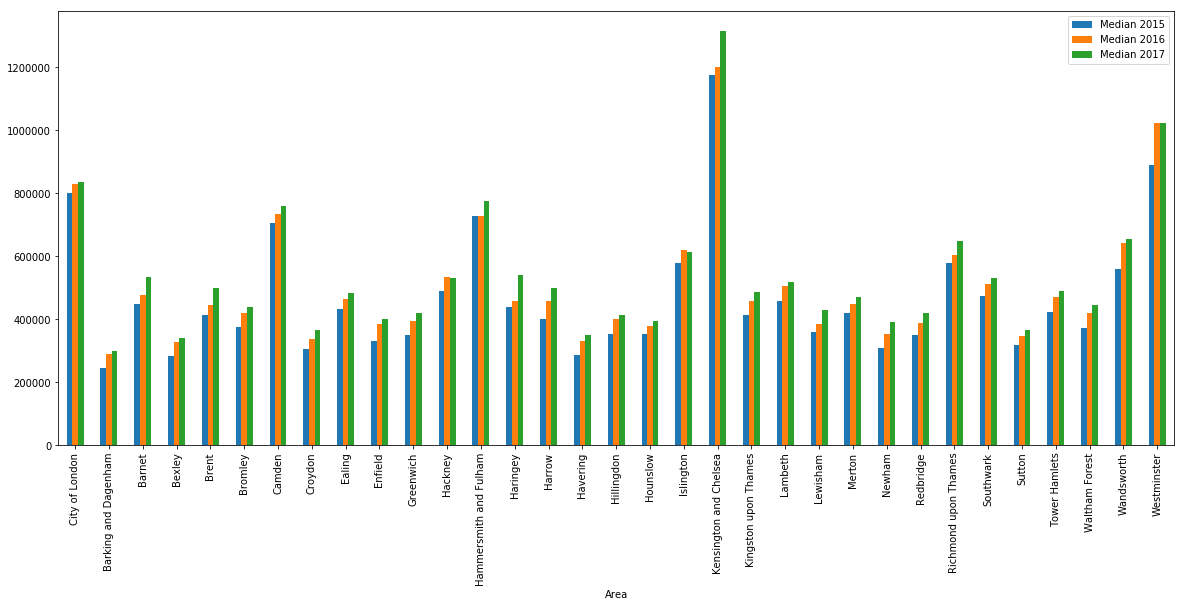

In [54]:
# get data for plotting
house2015 = df_house_price.loc[df_house_price['Year']== 'Year ending Dec 2015']
house2015 =house2015[['Area', 'Value']]

house2016 = df_house_price.loc[df_house_price['Year']== 'Year ending Dec 2016']
house2016 =house2016[['Area', 'Value']]

house2017 = df_house_price.loc[df_house_price['Year']== 'Year ending Dec 2017']
house2017 =house2017[['Area', 'Value']]

house_chart = pd.merge(house2015, house2016, on='Area')
house_chart = pd.merge(house_chart, house2017, on='Area')

house_chart.rename(columns={"Value_x": "Median 2015", "Value_y": "Median 2016", "Value": "Median 2017"}, inplace=True)

#Plot graph
house_chart.set_index('Area', inplace=True)
house_chart.plot.bar(figsize=(20,8))

In [63]:
house2017.set_index('Area', inplace=True)

In [65]:
map_df.drop('Avg PTA', axis=1, inplace=True)
map_df['Median House Price 2017'] = house2017['Value']

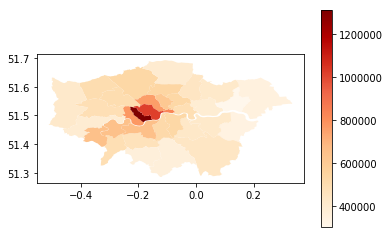

In [66]:
plot = map_df.plot(column='Median House Price 2017', cmap='OrRd', legend=True)
fig = plot.get_figure()

In [67]:
#Show the top 10 boroughs based on Median House Price 2017 
house2017.sort_values(by=['Value'], ascending=True, inplace=True)
house2017.head(10)

,Value
Area,
Barking and Dagenham,300000
Bexley,342500
Havering,350000
Croydon,365000
Sutton,367000
Newham,390500
Hounslow,395000
Enfield,402500
Hillingdon,415000


## Using Foursquare API for location data related to the London Boroughs

Part of the requirements for this capstone project is related to the use of FourSquare API for location information. The first step for the same is to get the geographical co-ordinates for the different London boroughs and load it into a data frame. 

In [72]:
#Latitude and longitude list of the london boroughs taken from Google
lat = [51.5123, 51.5465, 51.6251, 51.4519, 51.5673, 51.3680, 51.5517, 51.3816, 51.5250, 51.6636, 51.4835, 51.5734, 51.4990, 51.5906,
       51.5882, 51.5779, 51.5352, 51.4609, 51.5465, 51.4991, 51.3781, 51.4571, 51.4415, 51.4098, 51.5255, 51.5901, 51.4613, 51.4834,
       51.3574, 51.5203, 51.5886, 51.4571, 51.5002]

long = [-0.0910, 0.1293, -0.1529, 0.1172, -0.2711, 0.0701, -0.1588, -0.0928, -0.3414, -0.1043, 0.0586, -0.0724, -0.2291, -0.1110, 
        -0.3423, 0.2121, -0.4481, -0.3731, -0.1058, -0.1938, -0.2927, -0.1231, -0.0117, -0.2108, 0.0352, 0.0819, -0.3038, -0.0821, 
        -0.1753, -0.0293, -0.0118, -0.1818, -0.1332]

df_four_sq = pd.DataFrame(lat)
df_four_sq['Longitude'] = long
df_four_sq['Borough'] = df_school_pupil['Borough']
df_four_sq.columns = ['Latitude', 'Longitude', 'Borough'] 
df_four_sq.head()

,Latitude,Longitude,Borough
0,51.5123,-0.0910,City of London
1,51.5465,0.1293,Barking and Dagenham
2,51.6251,-0.1529,Barnet
3,51.4519,0.1172,Bexley
4,51.5673,-0.2711,Brent


In [73]:
# -- Import Libraries
import numpy as np
import json # library to handle JSON files

!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

!conda install -c conda-forge folium=0.5.0 --yes 
import folium # map rendering library

print('Libraries imported.')

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    openssl-1.1.1c             |       h516909a_0         2.1 MB  conda-forge
    geopy-1.20.0               |             py_0          57 KB  conda-forge
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    ca-certificates-2019.9.11  |       hecc5488_0         144 KB  conda-forge
    certifi-2019.9.11          |           py36_0         147 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         2.5 MB

The following NEW packages will be INSTALLED:

    geographiclib:   1.50-py_0         conda-forge
    geopy:           1.20.0-py_0       conda-forge

The following packages will be UPDATED:

    cer

In [74]:
address = 'London, United Kingdom'

geolocator = Nominatim(user_agent="lon_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of London are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of London are 51.5073219, -0.1276474.


After importing the relevant libraries, the co-ordinates of London are taken and a Folium map is built showing the different London boroughs.

In [77]:
# create map of London using latitude and longitude values
map_ldn = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough in zip(df_four_sq['Latitude'], df_four_sq['Longitude'], df_four_sq['Borough']):
    label = '{}'.format(borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_ldn)  
    
map_ldn

In [78]:
# -- Define Foursquare credentials
CLIENT_ID = 'R2VW5GIFGGQBV0QDEH5ULQNJEY5ISINXDVYEPIY40JYU1BYY' # your Foursquare ID
CLIENT_SECRET = 'KGG2SHF15NSFJ0J4GHFUAUDQN4L4GO22WQ3UDOXMJXPRTBFS' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

In [79]:
def getNearbyVenues(names, latitudes, longitudes, radius=300):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Borough', 
                  'Borough Latitude', 
                  'Borough Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

After obtaining the Foursquare credentials, I have defined a function that uses the Foursquare API credentials and gets the nearby venues for each of the London borough co-ordinates. 

For the purpose of this exercise, I have taken the radius as 350 metres and the limit on the number of venues as 20.

In [88]:
LIMIT = 20
radius = 350
ldn_borough_venues = getNearbyVenues(names=df_four_sq['Borough'],
                                   latitudes=df_four_sq['Latitude'],
                                   longitudes=df_four_sq['Longitude']
                                  )

City of London
Barking and Dagenham
Barnet
Bexley
Brent
Bromley
Camden
Croydon
Ealing
Enfield
Greenwich
Hackney
Hammersmith and Fulham
Haringey
Harrow
Havering
Hillingdon
Hounslow
Islington
Kensington and Chelsea
Kingston upon Thames
Lambeth
Lewisham
Merton
Newham
Redbridge
Richmond upon Thames
Southwark
Sutton
Tower Hamlets
Waltham Forest
Wandsworth
Westminster


In [89]:
print(ldn_borough_venues.shape)
ldn_borough_venues.head()

(195, 7)


,Borough,Borough Latitude,Borough Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,City of London,51.5123,-0.091,Rosslyn,51.512527,-0.093327,Coffee Shop
1,City of London,51.5123,-0.091,The Merchant House,51.513264,-0.093039,Cocktail Bar
2,City of London,51.5123,-0.091,The Ned Hotel,51.513755,-0.090067,Hotel
3,City of London,51.5123,-0.091,Host,51.512629,-0.093211,Coffee Shop
4,City of London,51.5123,-0.091,Porterford Butchers,51.513032,-0.093737,Butcher


In [92]:
ldn_borough_venues.groupby('Borough').count()

,Borough Latitude,Borough Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Borough,,,,,,
Barnet,4,4,4,4,4,4
Bexley,2,2,2,2,2,2
Brent,1,1,1,1,1,1
Bromley,1,1,1,1,1,1
Camden,5,5,5,5,5,5
City of London,20,20,20,20,20,20
Croydon,4,4,4,4,4,4
Ealing,4,4,4,4,4,4
Enfield,3,3,3,3,3,3


In [93]:
print('There are {} unique categories.'.format(len(ldn_borough_venues['Venue Category'].unique())))

There are 85 unique categories.


Once the output from the FourSquare API is obtained for all the London boroughs, I have grouped the output by boroughs and obtained a count of the venues obtained by the API.

After identifying the number of unique categories of the venues, I have performed one-hot encoding from the resultant data to show the different categories of venues and the relevant scores (between 0 and 1) corresponding to the particular borough and type of venue.

This data is then grouped by Borough and mean scores obtained for the same.

In [94]:
# one hot encoding
ldn_borough_onehot = pd.get_dummies(ldn_borough_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
ldn_borough_onehot['Borough'] = ldn_borough_venues['Borough'] 

# move neighborhood column to the first column
fixed_columns = [ldn_borough_onehot.columns[-1]] + list(ldn_borough_onehot.columns[:-1])
ldn_borough_onehot = ldn_borough_onehot[fixed_columns]

ldn_borough_onehot.head()

,Borough,Argentinian Restaurant,Auto Garage,Auto Workshop,Bakery,Bar,Bed & Breakfast,Beer Bar,Bookstore,Brazilian Restaurant,...,Supermarket,Sushi Restaurant,Theater,Thrift / Vintage Store,Train Station,Turkish Restaurant,Udon Restaurant,Vietnamese Restaurant,Wine Bar,Women's Store
0,City of London,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,City of London,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,City of London,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,City of London,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,City of London,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [95]:
ldn_borough_grouped = ldn_borough_onehot.groupby('Borough').mean().reset_index()
ldn_borough_grouped

,Borough,Argentinian Restaurant,Auto Garage,Auto Workshop,Bakery,Bar,Bed & Breakfast,Beer Bar,Bookstore,Brazilian Restaurant,...,Supermarket,Sushi Restaurant,Theater,Thrift / Vintage Store,Train Station,Turkish Restaurant,Udon Restaurant,Vietnamese Restaurant,Wine Bar,Women's Store
0,Barnet,0.00,0.00,0.000000,0.000000,0.00,0.0,0.00,0.00,0.0,...,0.000000,0.00,0.00,0.00,0.000000,0.00,0.00,0.00,0.0,0.00
1,Bexley,0.00,0.00,0.000000,0.000000,0.00,0.0,0.00,0.00,0.0,...,0.000000,0.00,0.00,0.00,0.000000,0.00,0.00,0.00,0.0,0.00
2,Brent,0.00,0.00,0.000000,0.000000,0.00,0.0,0.00,0.00,0.0,...,0.000000,0.00,0.00,0.00,0.000000,0.00,0.00,0.00,0.0,0.00
3,Bromley,0.00,0.00,0.000000,0.000000,0.00,0.0,0.00,0.00,0.0,...,0.000000,0.00,0.00,0.00,0.000000,0.00,0.00,0.00,0.0,0.00
4,Camden,0.00,0.00,0.000000,0.000000,0.00,0.0,0.00,0.00,0.0,...,0.000000,0.00,0.00,0.00,0.000000,0.00,0.00,0.00,0.0,0.00
5,City of London,0.00,0.00,0.000000,0.000000,0.05,0.0,0.00,0.05,0.0,...,0.000000,0.00,0.00,0.00,0.000000,0.00,0.05,0.00,0.1,0.00
6,Croydon,0.00,0.25,0.000000,0.000000,0.00,0.0,0.00,0.00,0.0,...,0.000000,0.00,0.00,0.00,0.000000,0.00,0.00,0.00,0.0,0.00
7,Ealing,0.00,0.00,0.000000,0.000000,0.00,0.0,0.00,0.00,0.0,...,0.000000,0.00,0.00,0.00,0.000000,0.00,0.00,0.00,0.0,0.00
8,Enfield,0.00,0.00,0.333333,0.000000,0.00,0.0,0.00,0.00,0.0,...,0.000000,0.00,0.00,0.00,0.000000,0.00,0.00,0.00,0.0,0.00
9,Greenwich,0.00,0.00,0.000000,0.000000,0.00,0.0,0.00,0.00,0.0,...,0.000000,0.00,0.00,0.00,0.000000,0.00,0.00,0.00,0.0,0.00


The final step is to define a function that returns the type of the most common venue for each of the London borough. For the purposes of this exercise, I have restricted it to 5 most common category of venues for each borough.

In [96]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [97]:
num_top_venues = 5

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Borough']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
ldn_borough_venues_sorted = pd.DataFrame(columns=columns)
ldn_borough_venues_sorted['Borough'] = ldn_borough_grouped['Borough']

for ind in np.arange(ldn_borough_grouped.shape[0]):
    ldn_borough_venues_sorted.iloc[ind, 1:] = return_most_common_venues(ldn_borough_grouped.iloc[ind, :], num_top_venues)

ldn_borough_venues_sorted

,Borough,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Barnet,Café,Diner,Bus Stop,Women's Store,Cupcake Shop
1,Bexley,Sports Club,Lake,Fish & Chips Shop,Cycle Studio,Deli / Bodega
2,Brent,Food Truck,Fish & Chips Shop,Cycle Studio,Deli / Bodega,Diner
3,Bromley,Construction & Landscaping,Fish & Chips Shop,Cycle Studio,Deli / Bodega,Diner
4,Camden,Gastropub,Gym / Fitness Center,French Restaurant,Museum,Women's Store
5,City of London,Café,Coffee Shop,Hotel,Wine Bar,French Restaurant
6,Croydon,Auto Garage,Gym,South Indian Restaurant,Motorcycle Shop,Women's Store
7,Ealing,Fish & Chips Shop,Grocery Store,Pharmacy,Event Service,Women's Store
8,Enfield,Pub,Auto Workshop,Bus Stop,Fish & Chips Shop,Deli / Bodega
9,Greenwich,Park,Women's Store,Fish & Chips Shop,Deli / Bodega,Diner
